In [1]:
# OG code by Krutarth Bhatt
# modified by Maddie 10/4/22

## Rock Matching with Euclidean Distance, TF2 Translation Experiments 12/15/23

In [2]:
#Libraries
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sqrt
from matplotlib.patches import ConnectionPatch
import os
from scipy.spatial.distance import euclidean
import shapely
from shapely.geometry import LineString
from shapely import affinity

import RM_functions as rm # script with rock matching functions

## Working directory
print(os.getcwd())
#os.chdir("src/Rock_Matching_Files/") #do not need for VScode Interactive 

/workspaces/rgr/src/Rock_Matching_Files


## Set TimeFrame 2 Params

How do you want the rocks to of changed from TF1 to TF2?

## Choose Parameters for Simiarity analysis
Options:

all_geom        --- uses all geometric traits (equally weighted)

jus_centroid    ---- only considers the centroid coordinates (spatial position of each rock)

jus_area        ----- only considers the area of each rock

jus_ecc         ----- only considers eccentricity of rocks

jus_perimeter  --- only considers perimeter of rocks 

jus_compactness --- only considers compactness of rocks

jus_convexity --- only considers convexity of rocks 

jus_angle -- only considers angle of rocks

all --- uses all geometric traits (equally weighted) + centroid coordinates

In [3]:
#use_params = 'jus_angle'

exp_arr = ['all_geom','all','jus_centroid','jus_area','jus_ecc','jus_perimeter','jus_compactness','jus_convexity','jus_angle']

trans_exps = [0,0.001,0.01,0.1,1,10,100]
rot_exps = [0,10,20,30,40,50,60,70,80,90,180]

#area_exps = [0.001,0.01,0.1,1,10,100]

#mod_dict = {'trans_exps':[0.001,0.01,0.1,1,10,100],
#'rot_exps':[10,20,30,40,50,60,70,80,90,180]
#}


## Choose TF2 Scenario to Run

In [4]:
mod = trans_exps

## run loop

opening shapefile..
use_params all_geom
translating TF20 meters
running geometric calculations for df...
running geometric calculations for df3....
running vectorization...
checking matches:
opening shapefile..
use_params all_geom
translating TF20.001 meters
running geometric calculations for df...
running geometric calculations for df3....
running vectorization...
checking matches:
opening shapefile..
use_params all_geom
translating TF20.01 meters
running geometric calculations for df...
running geometric calculations for df3....
running vectorization...
checking matches:
opening shapefile..
use_params all_geom
translating TF20.1 meters
running geometric calculations for df...
running geometric calculations for df3....
running vectorization...
checking matches:
opening shapefile..
use_params all_geom
translating TF21 meters
running geometric calculations for df...
running geometric calculations for df3....
running vectorization...
checking matches:
opening shapefile..
use_params all_g

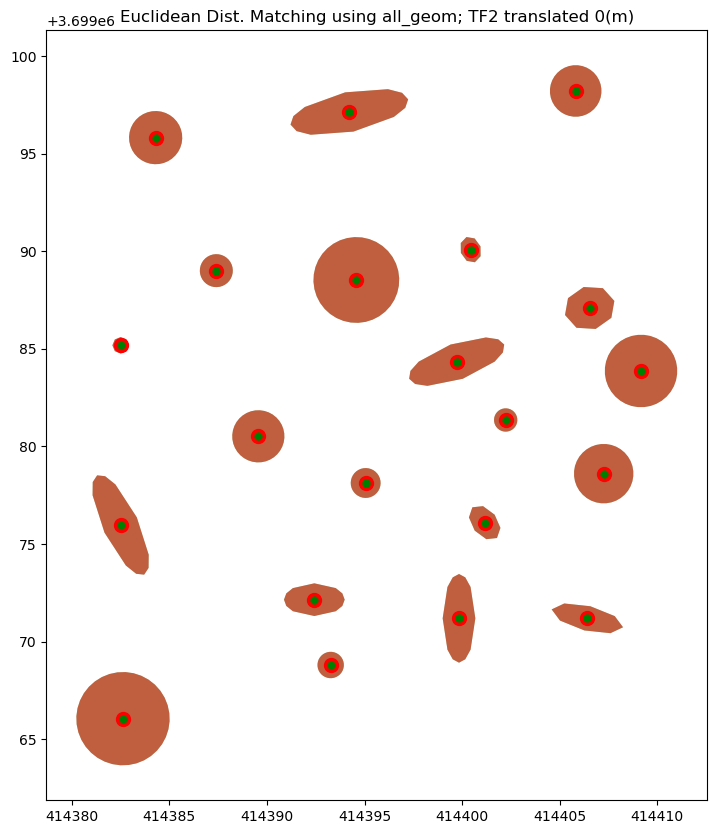

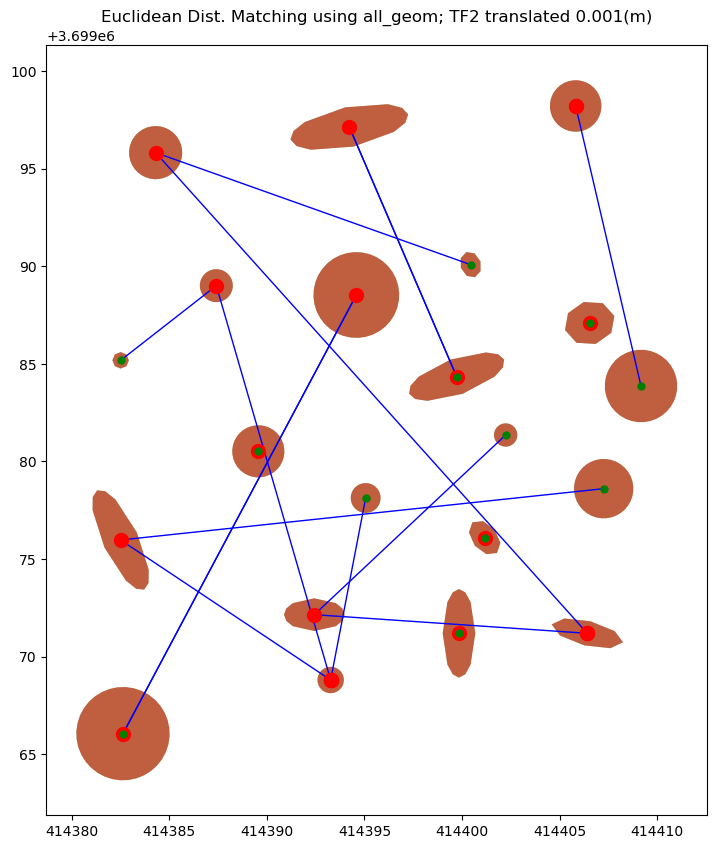

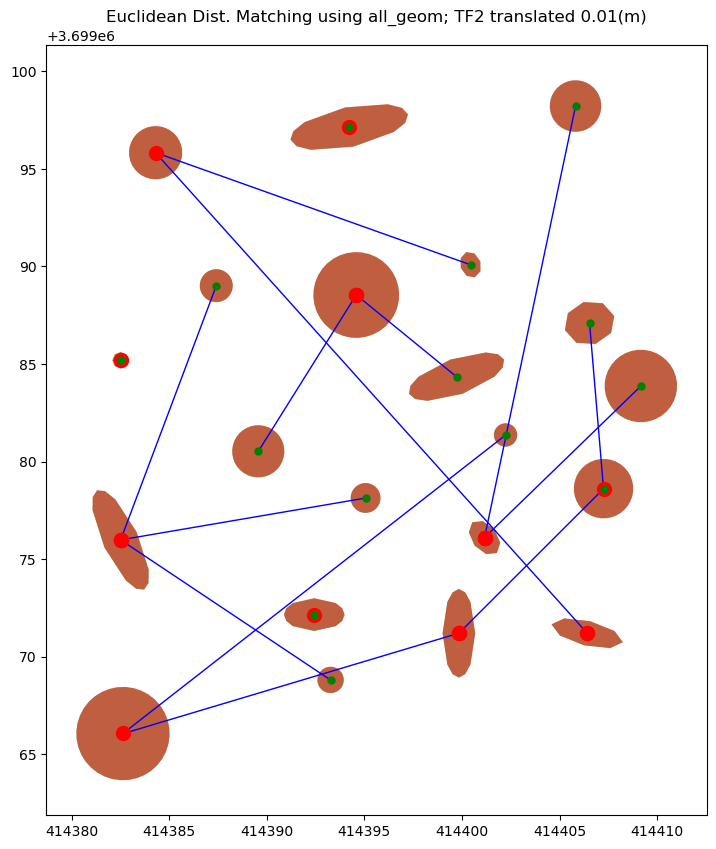

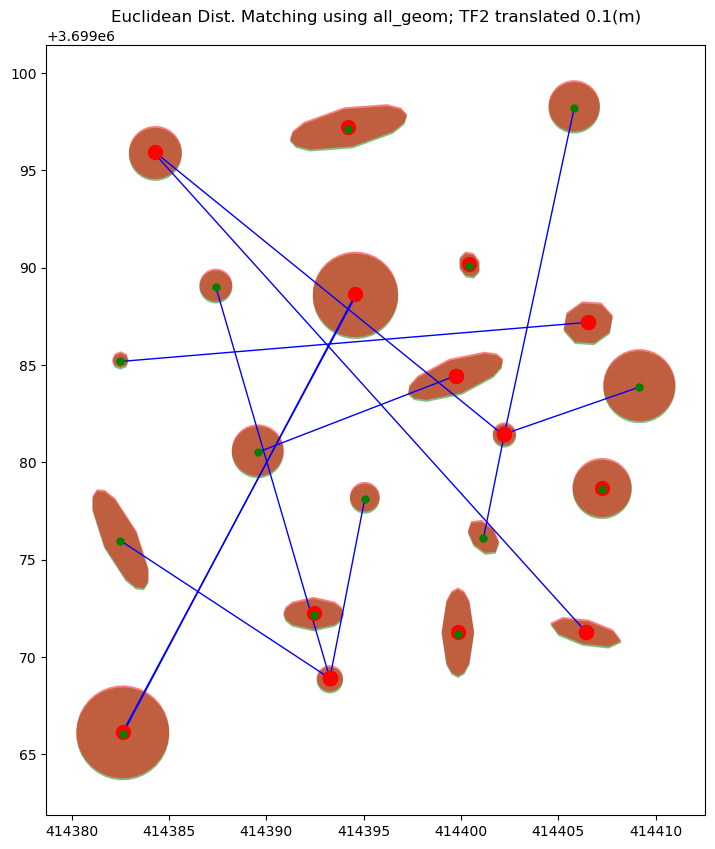

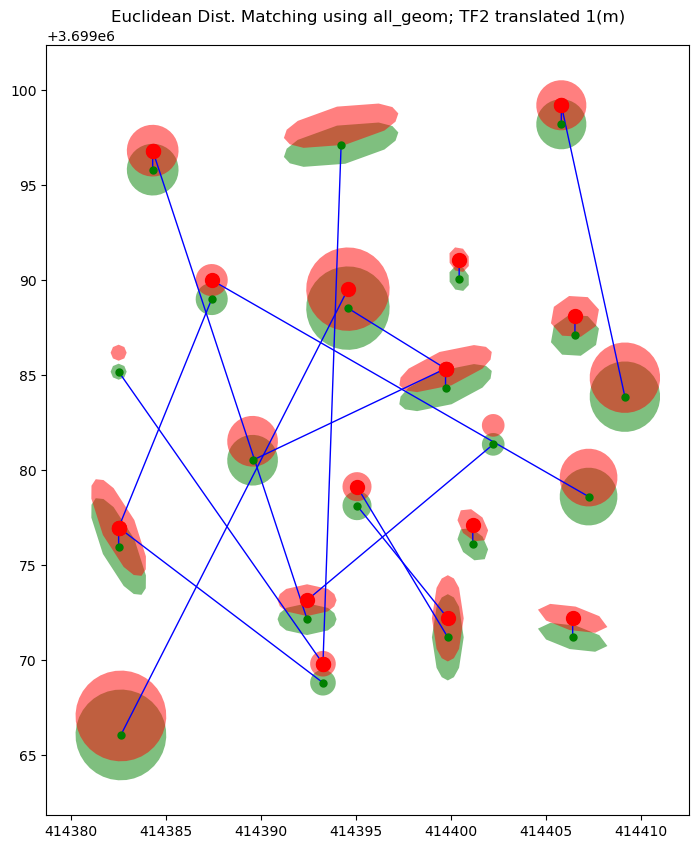

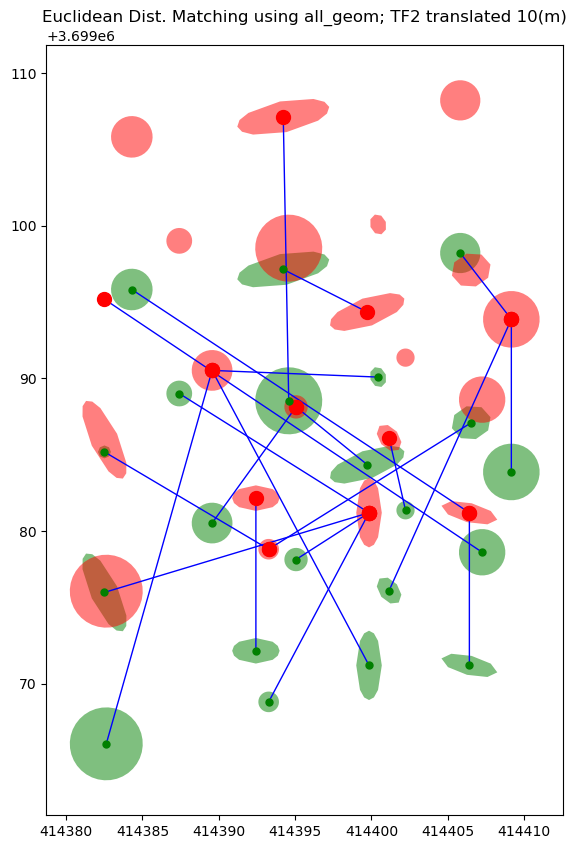

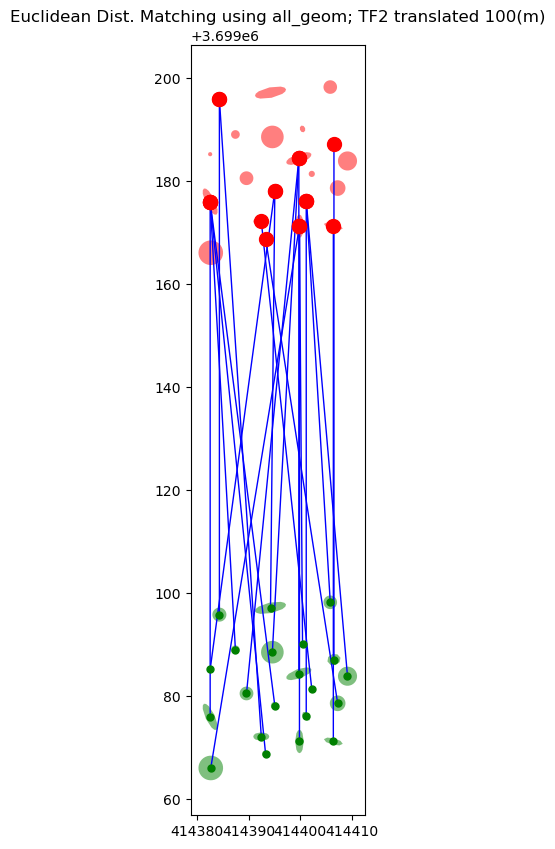

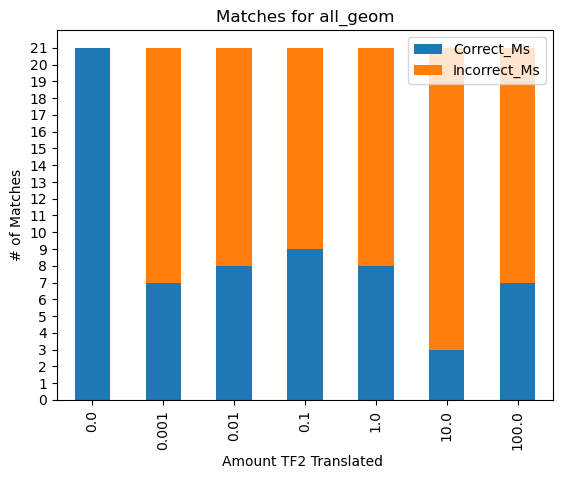

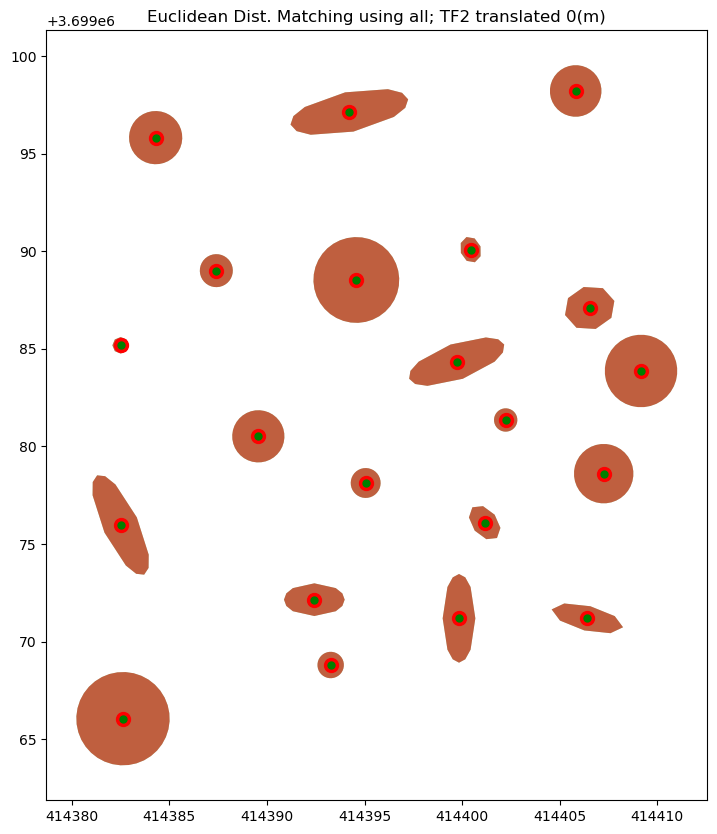

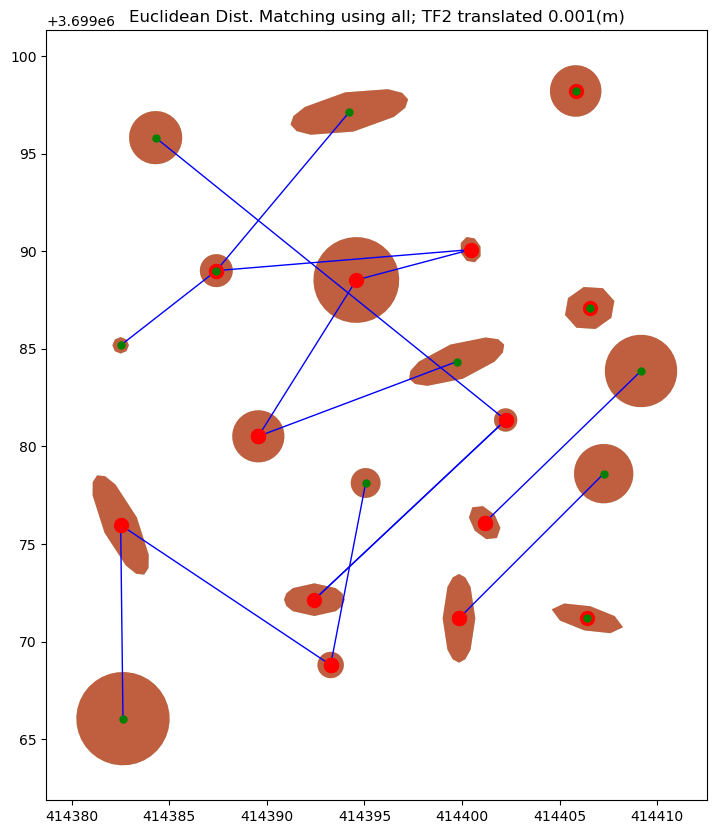

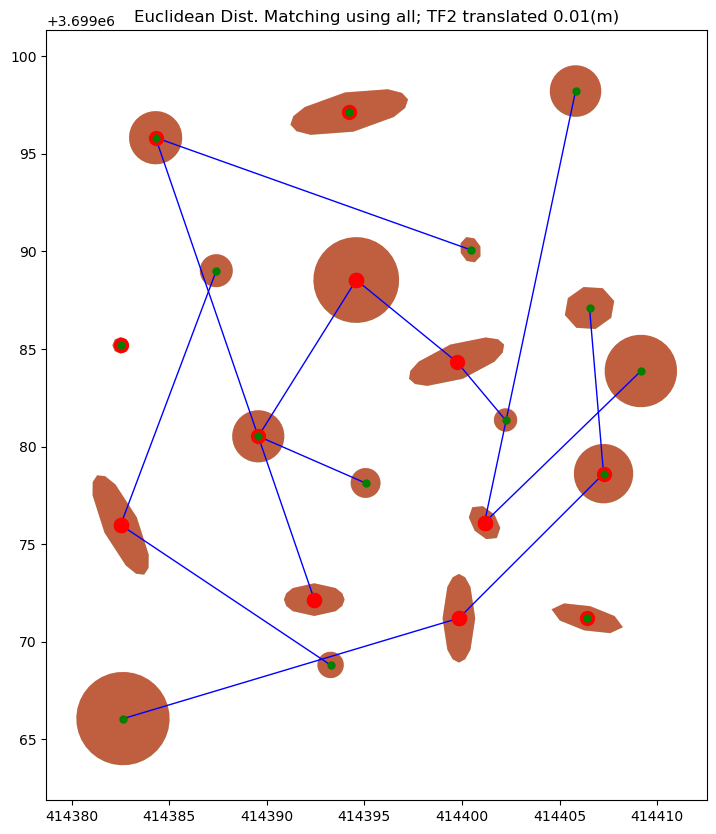

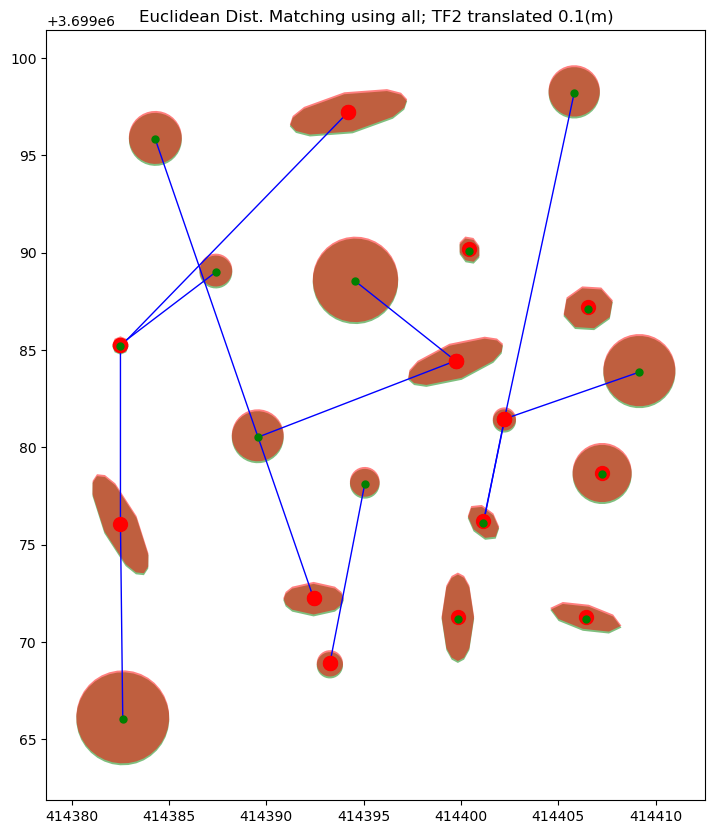

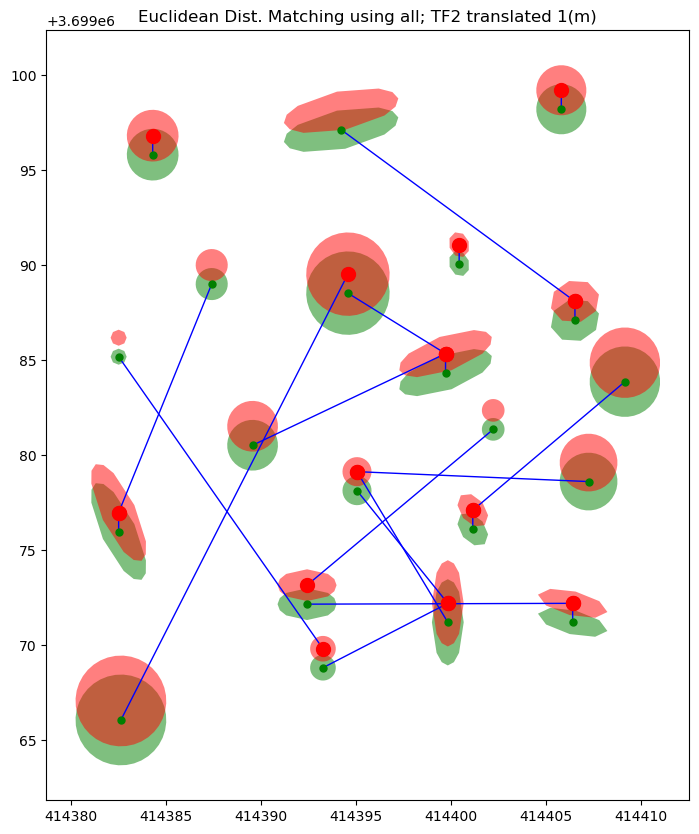

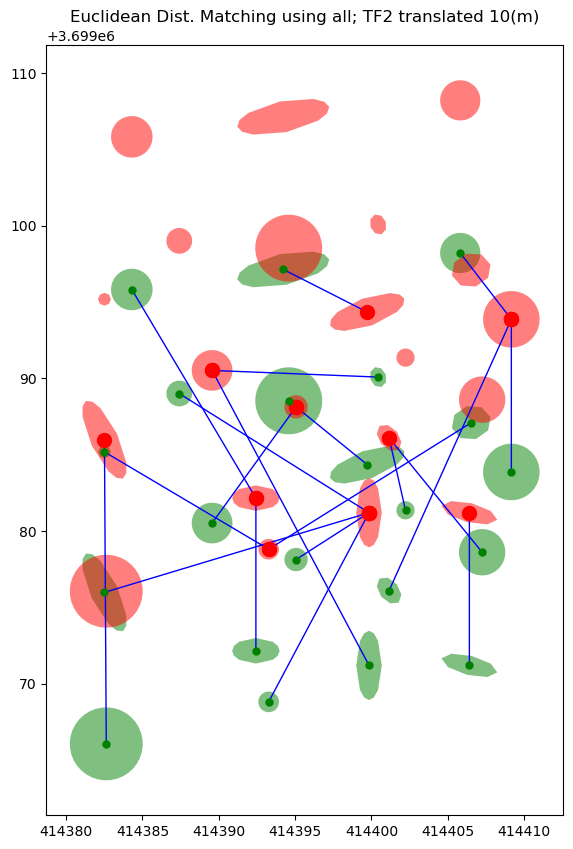

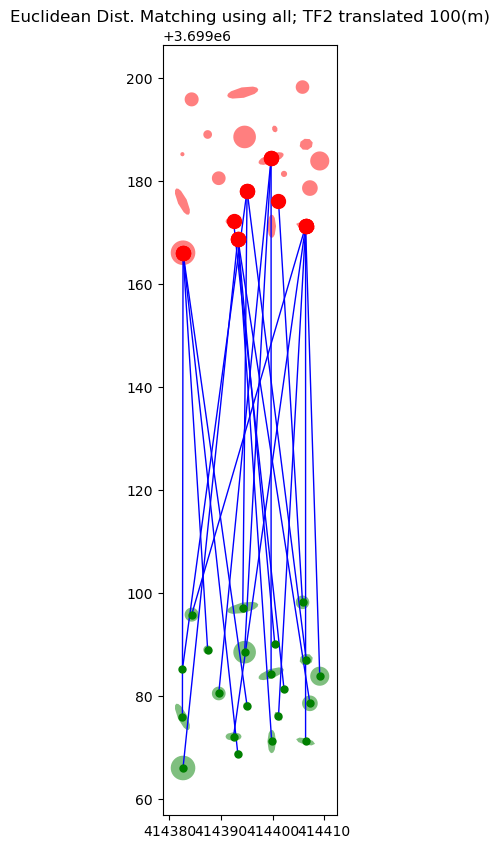

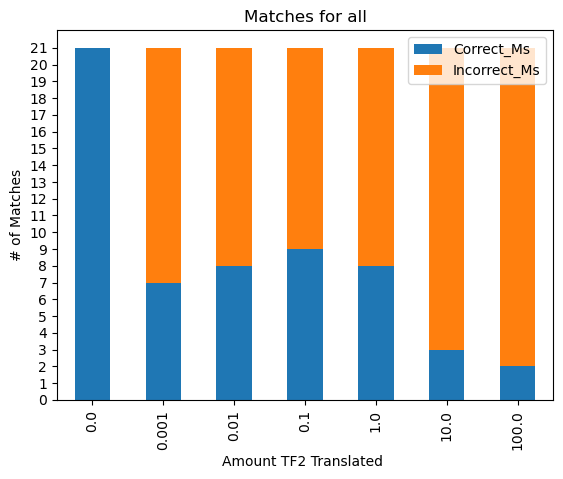

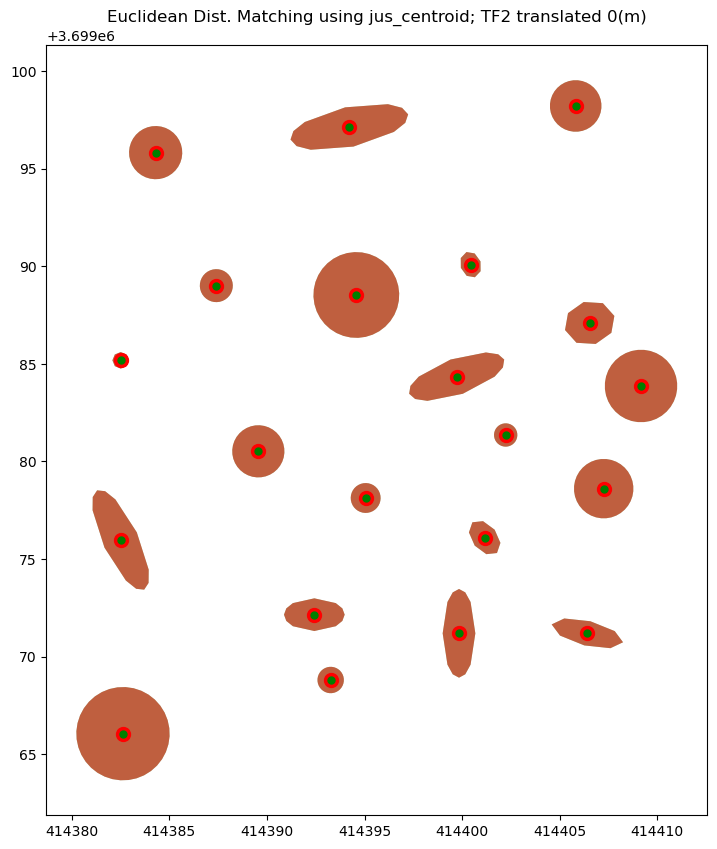

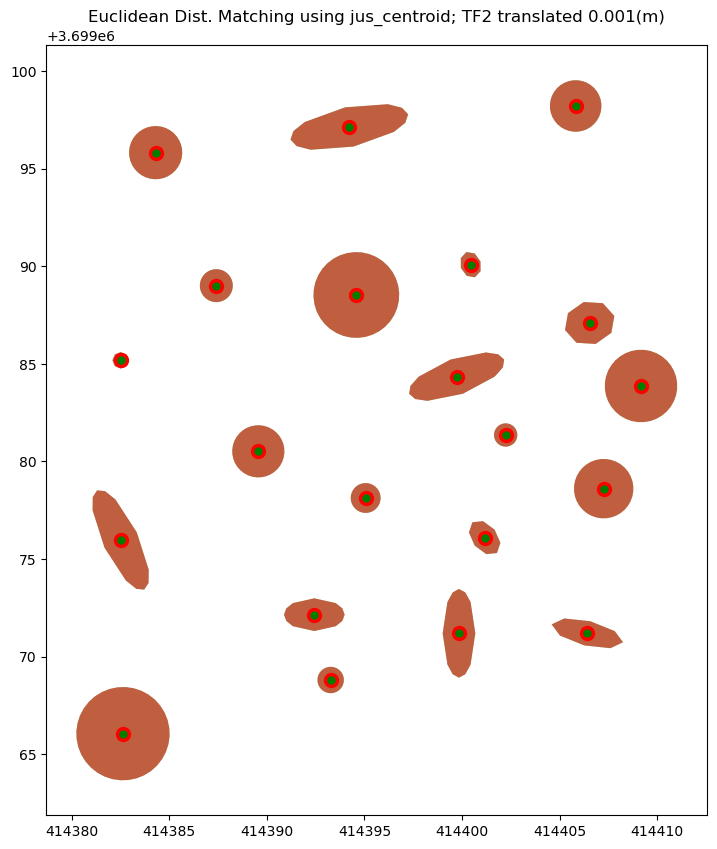

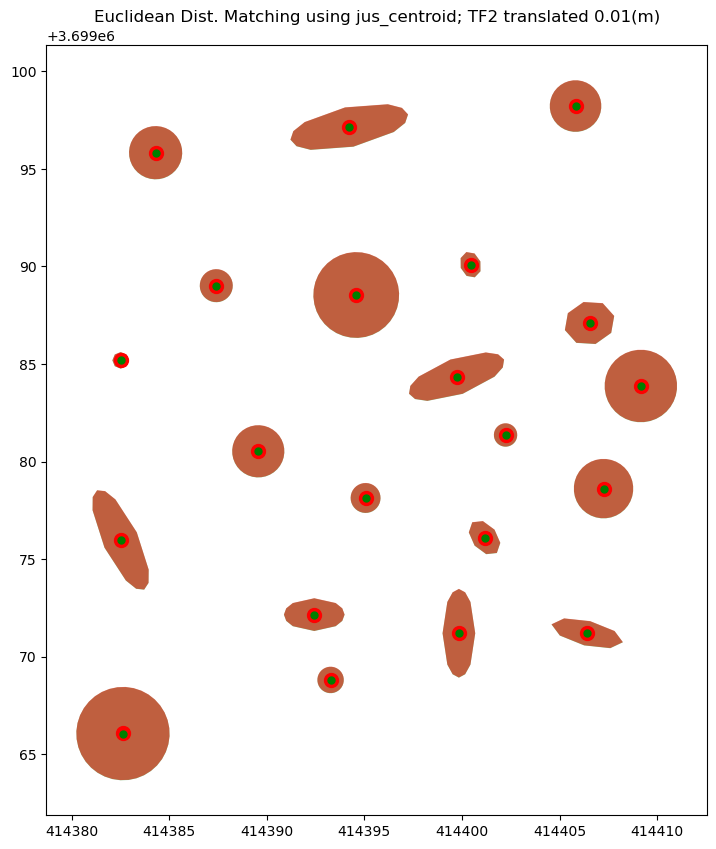

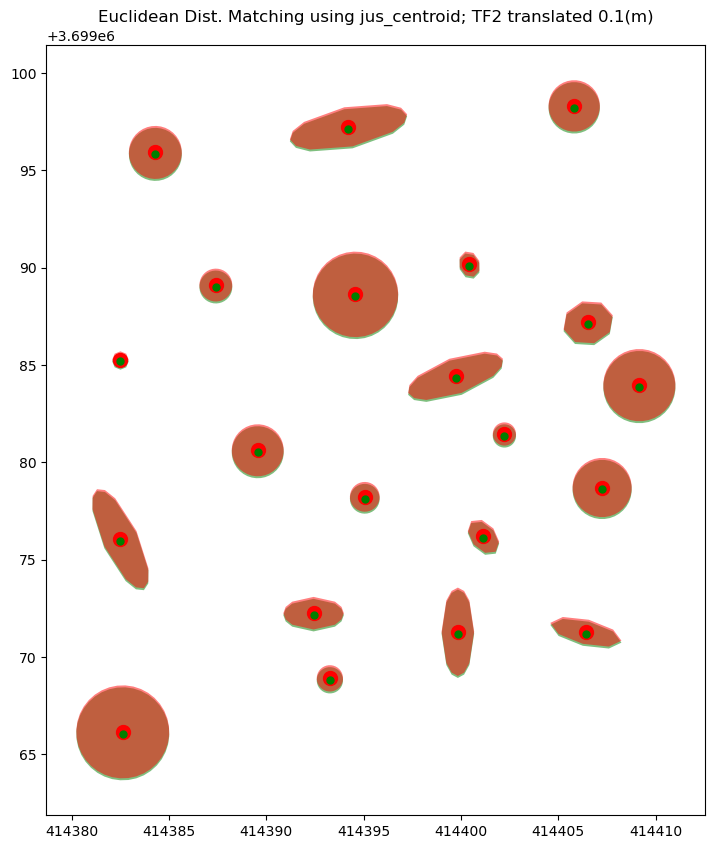

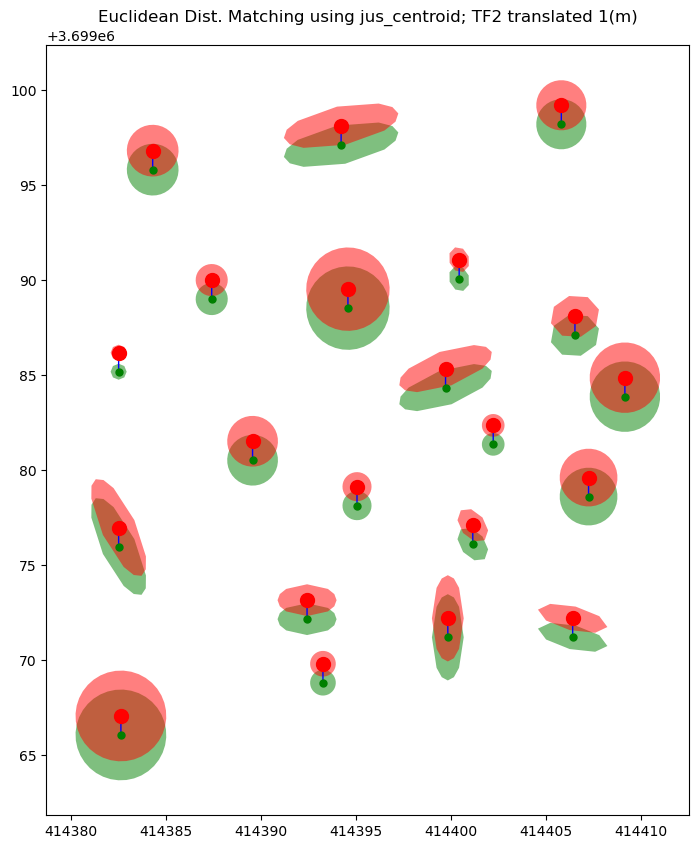

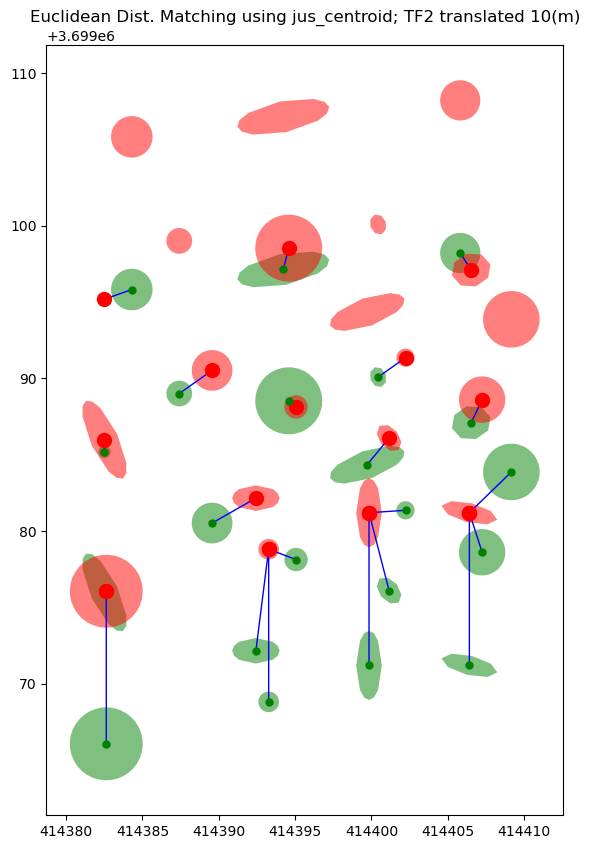

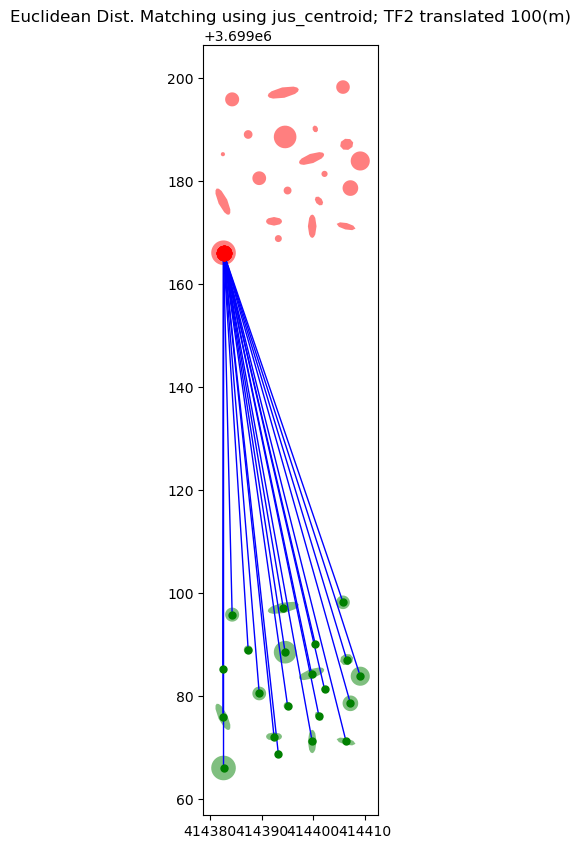

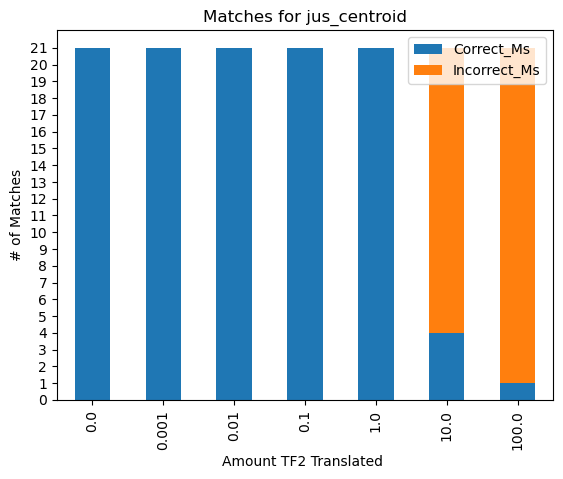

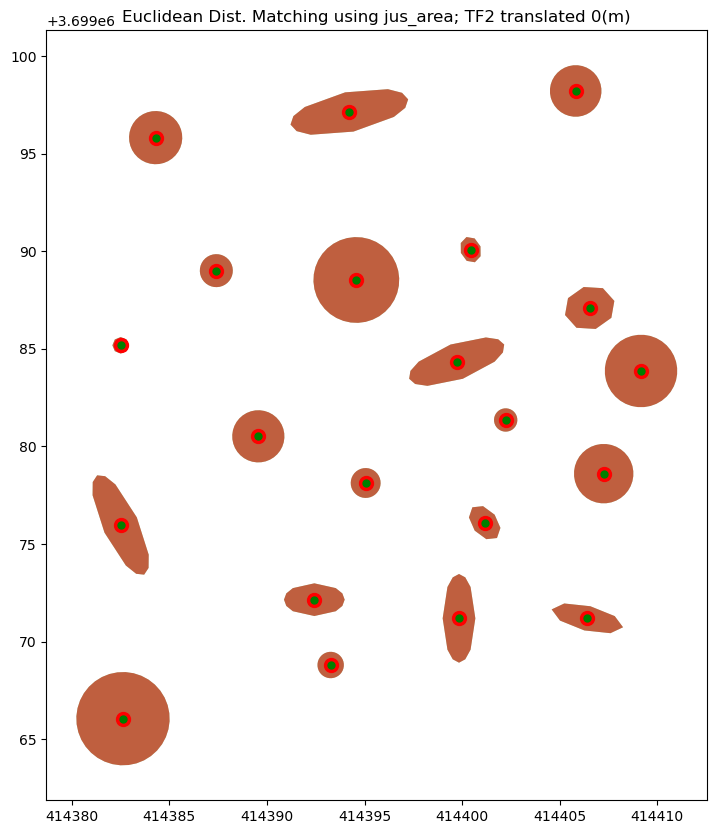

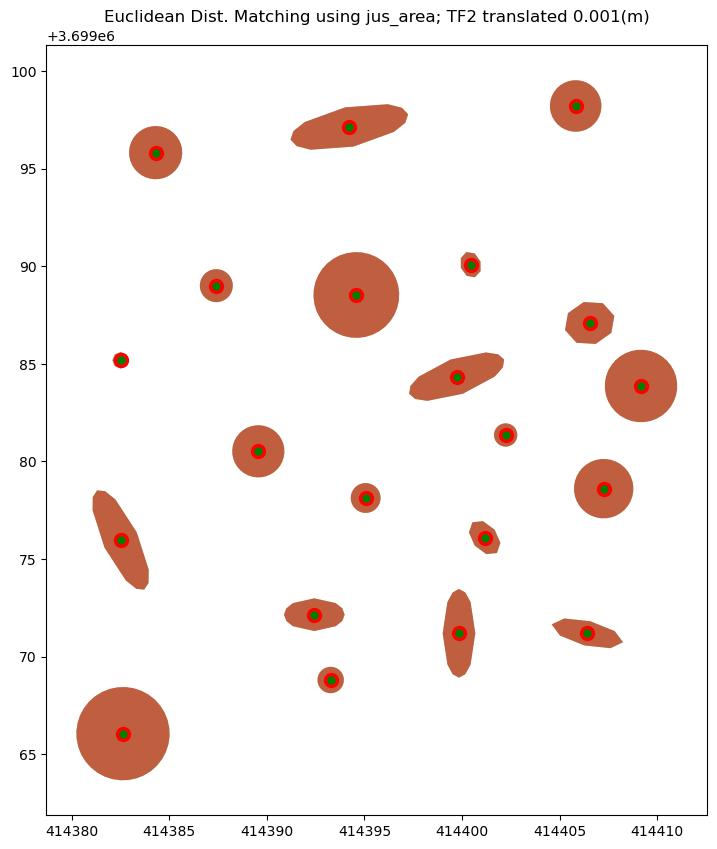

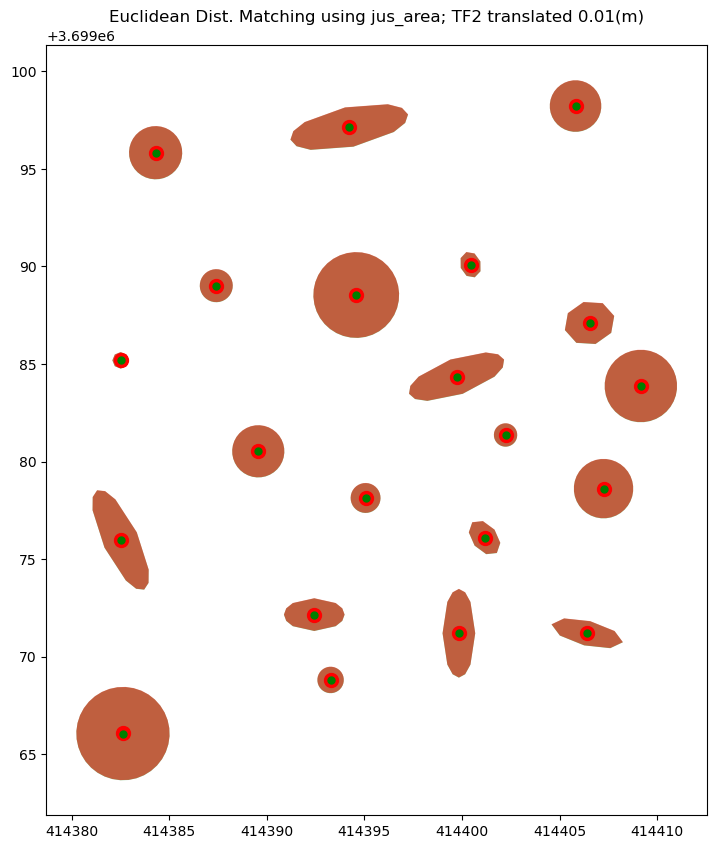

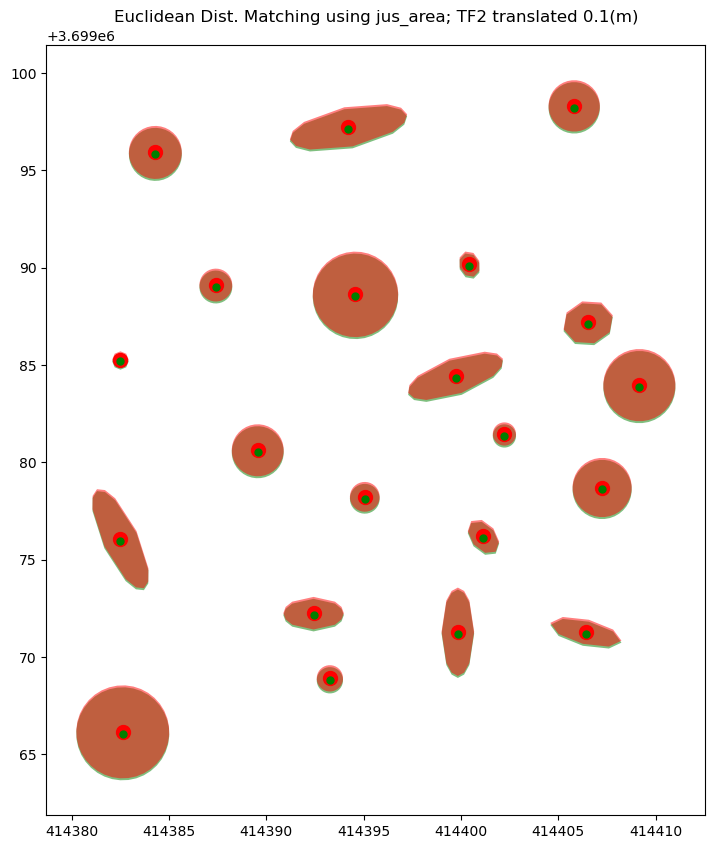

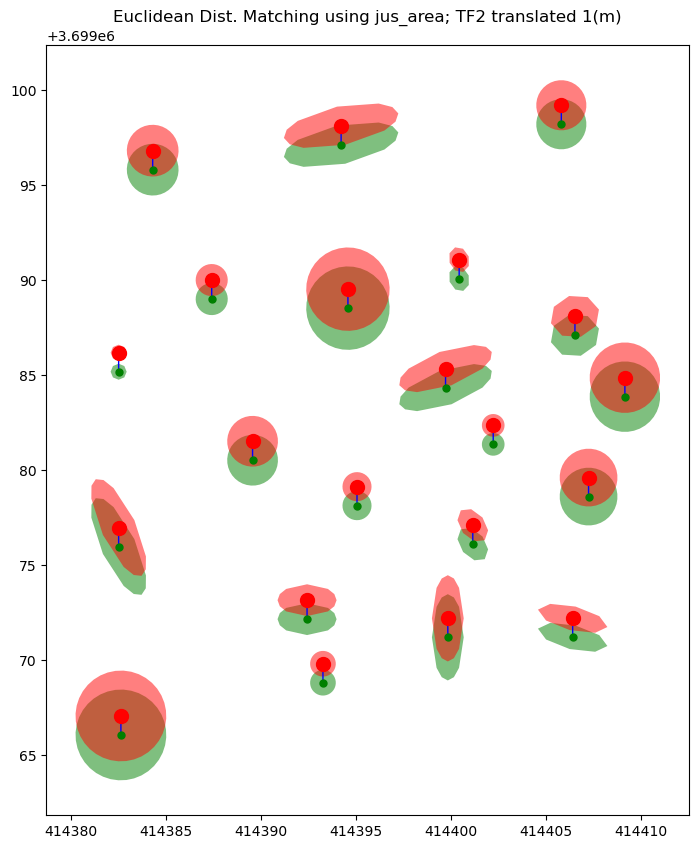

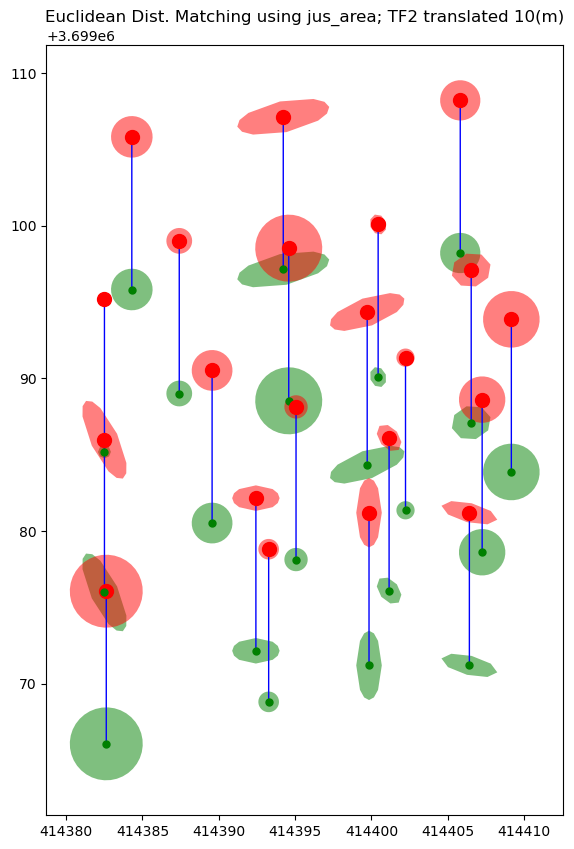

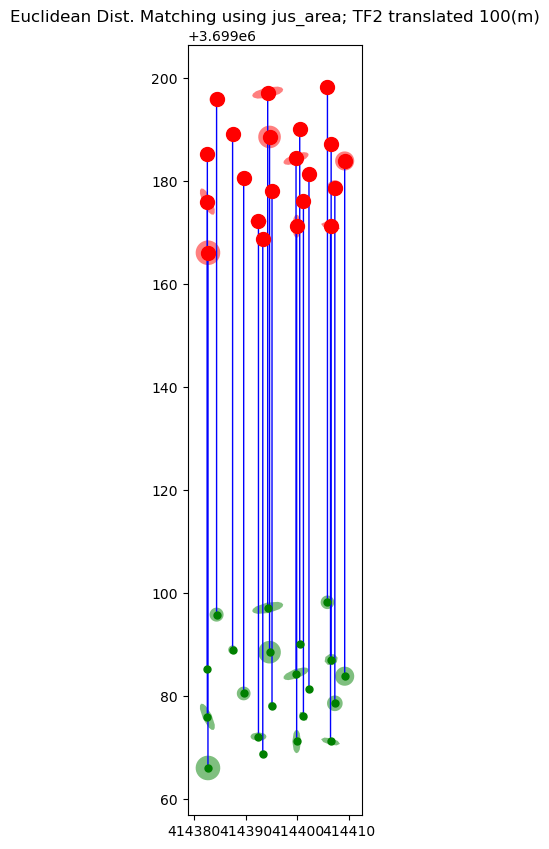

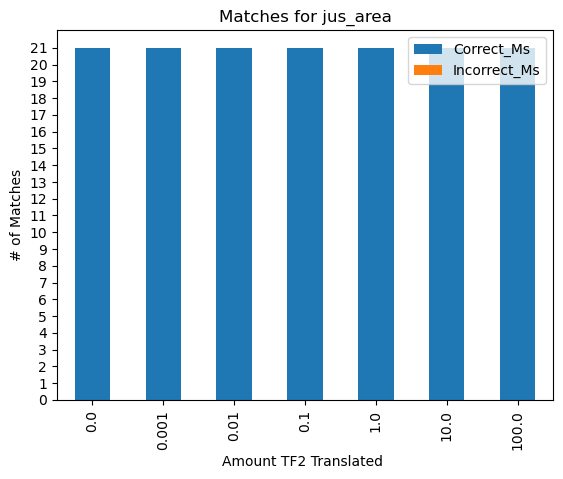

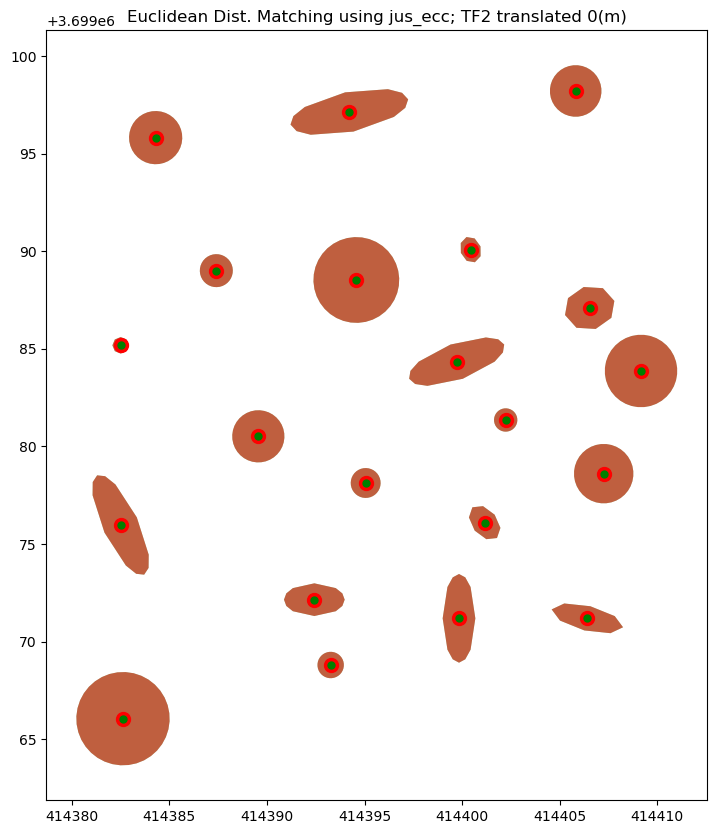

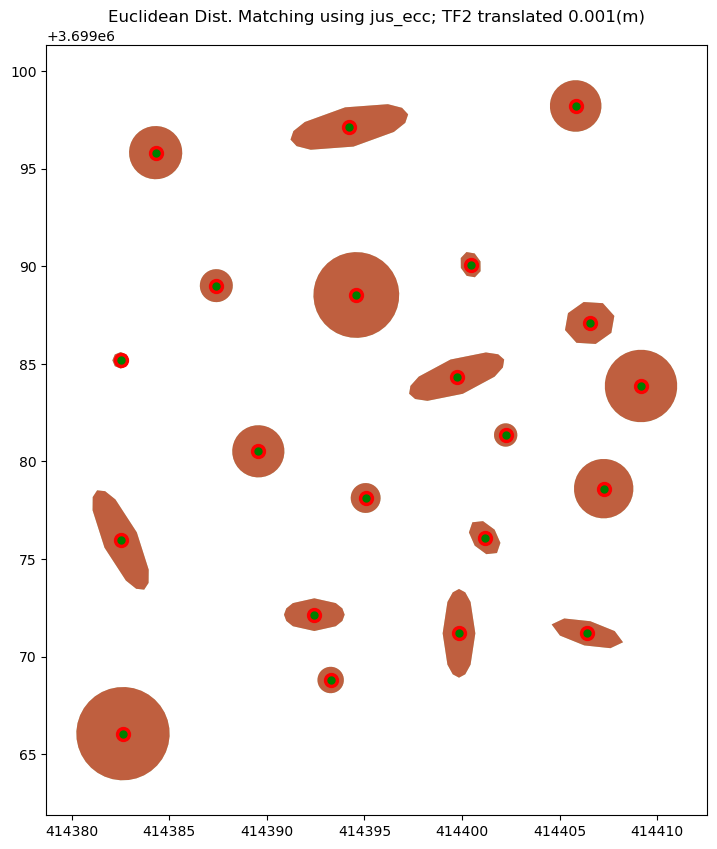

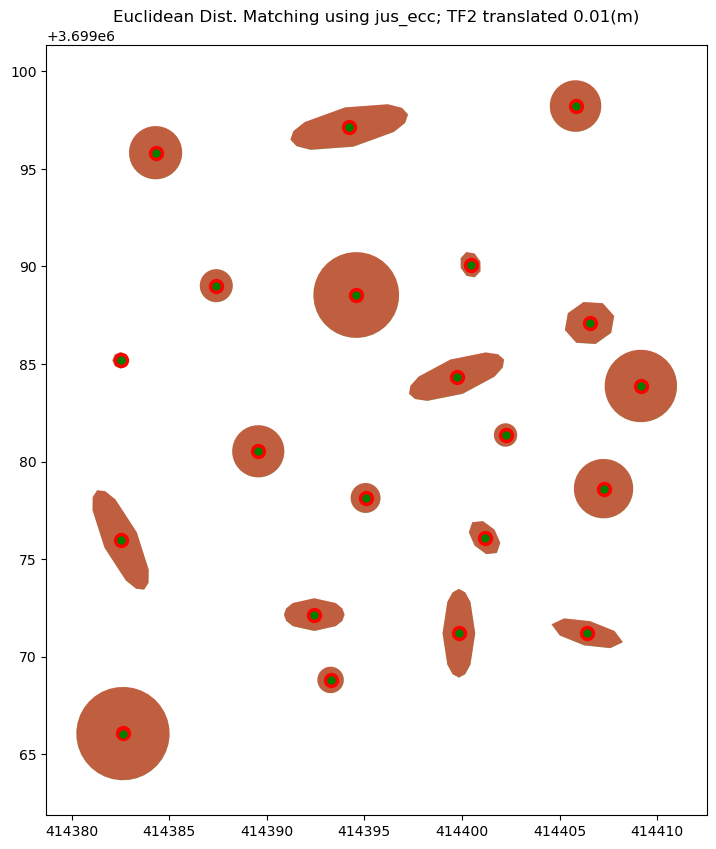

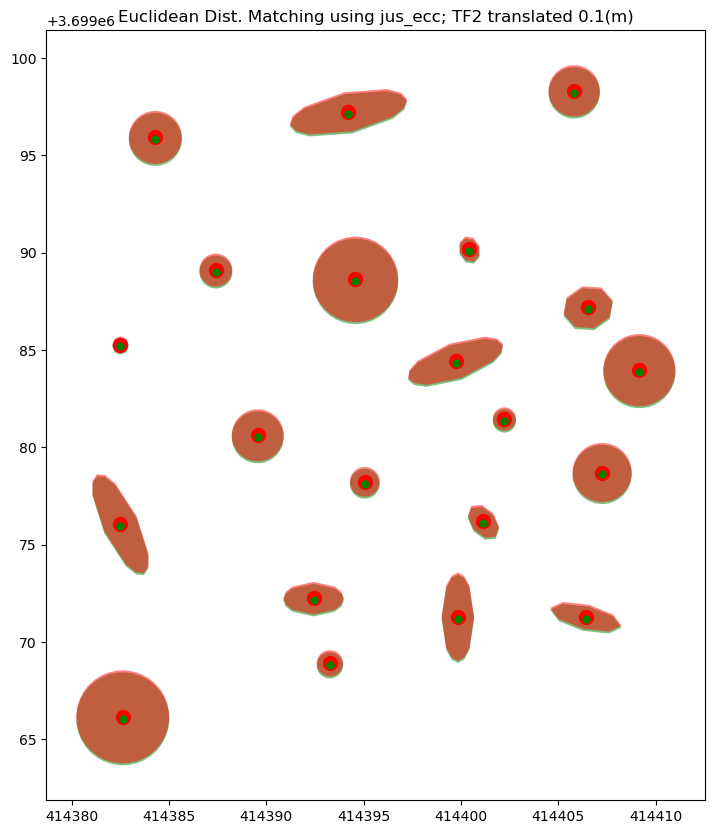

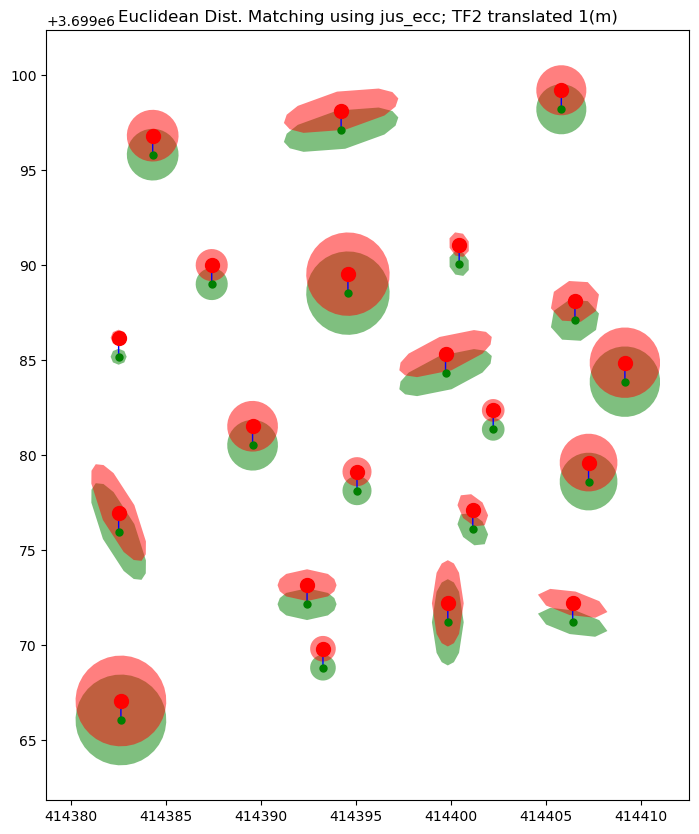

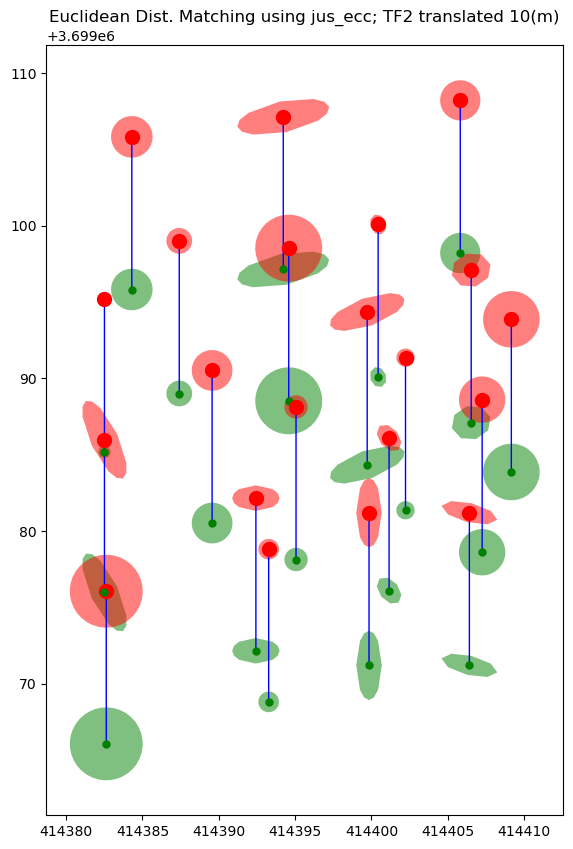

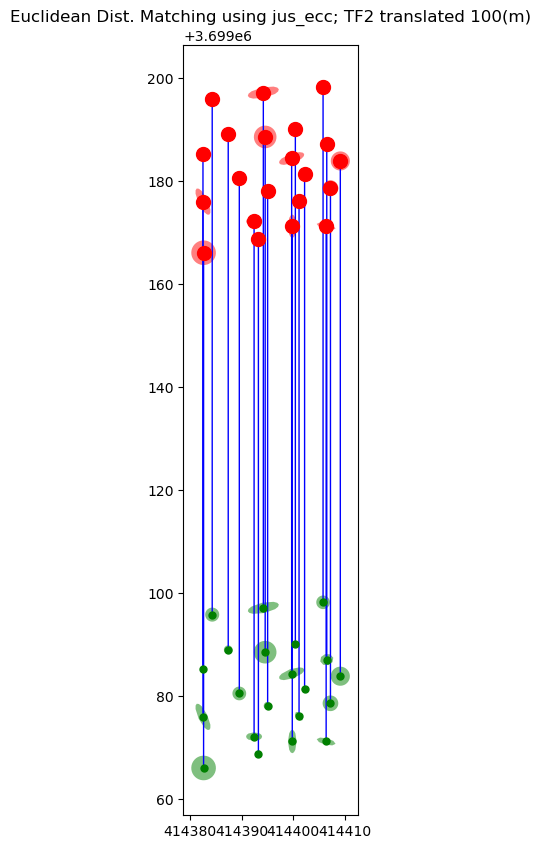

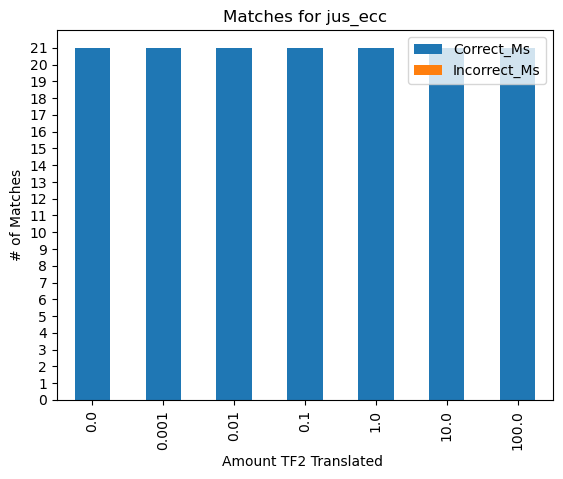

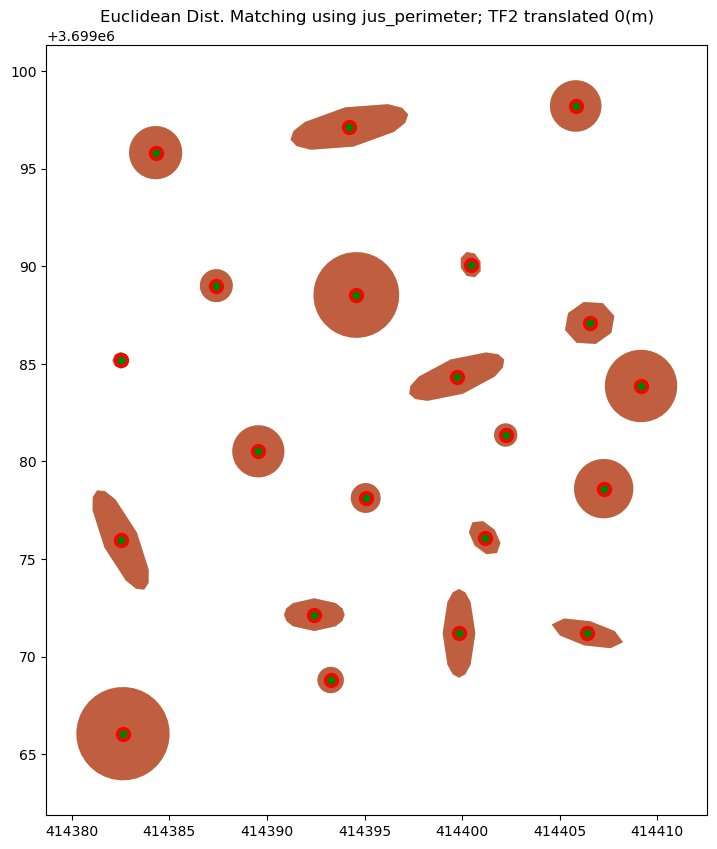

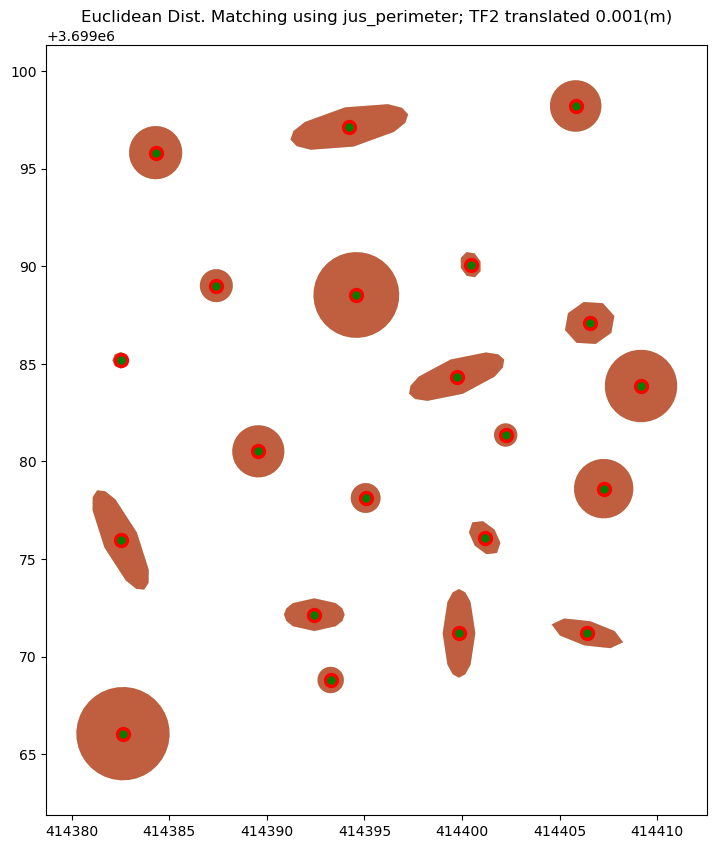

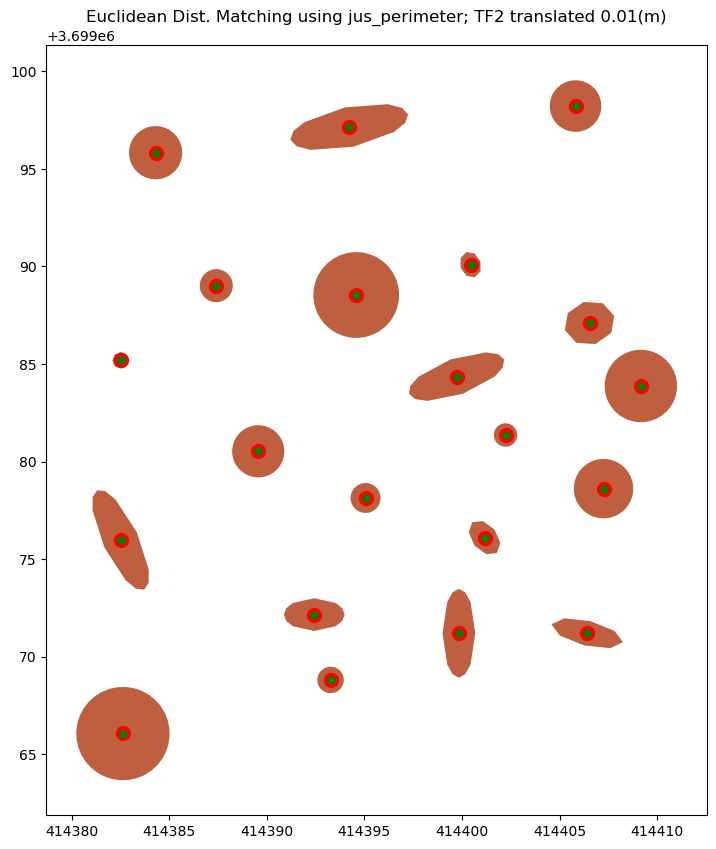

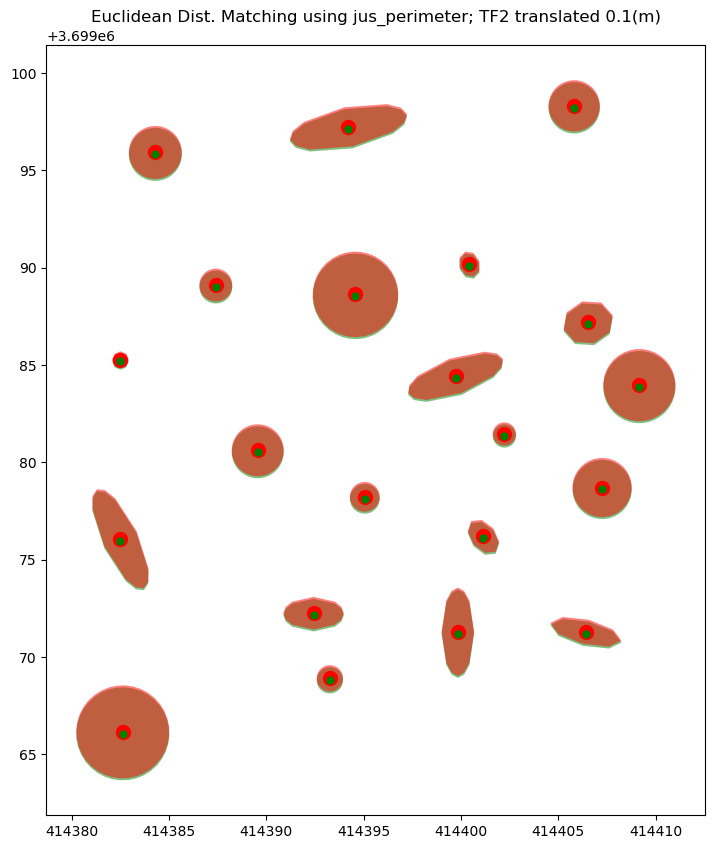

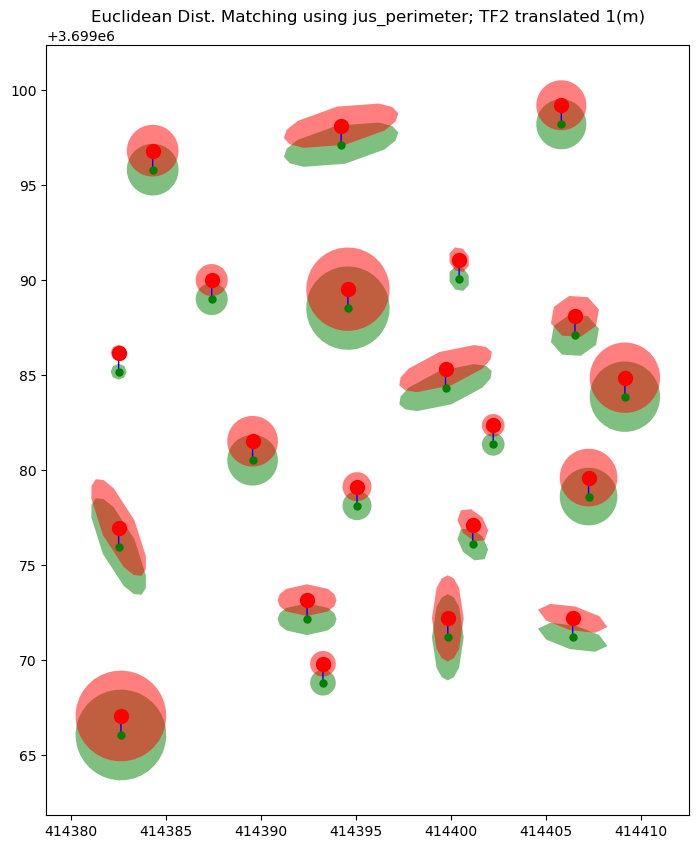

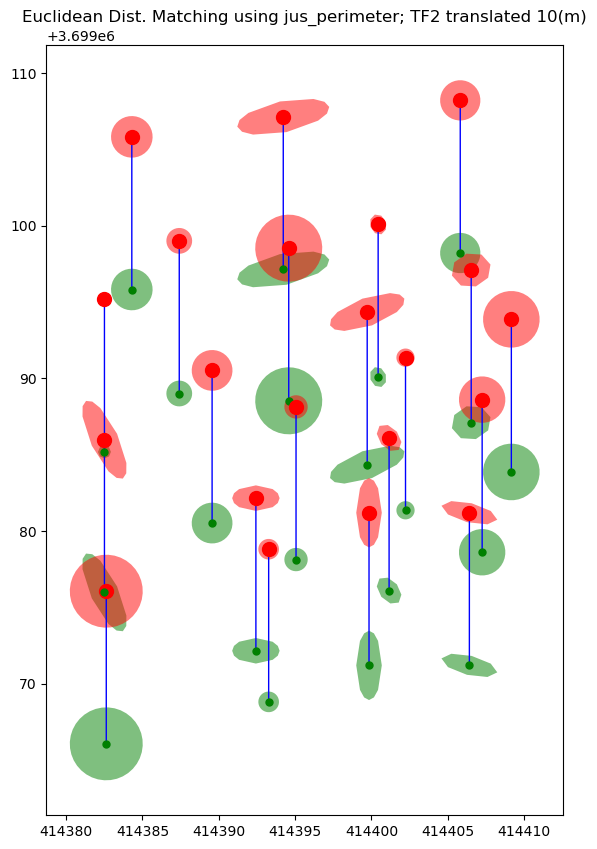

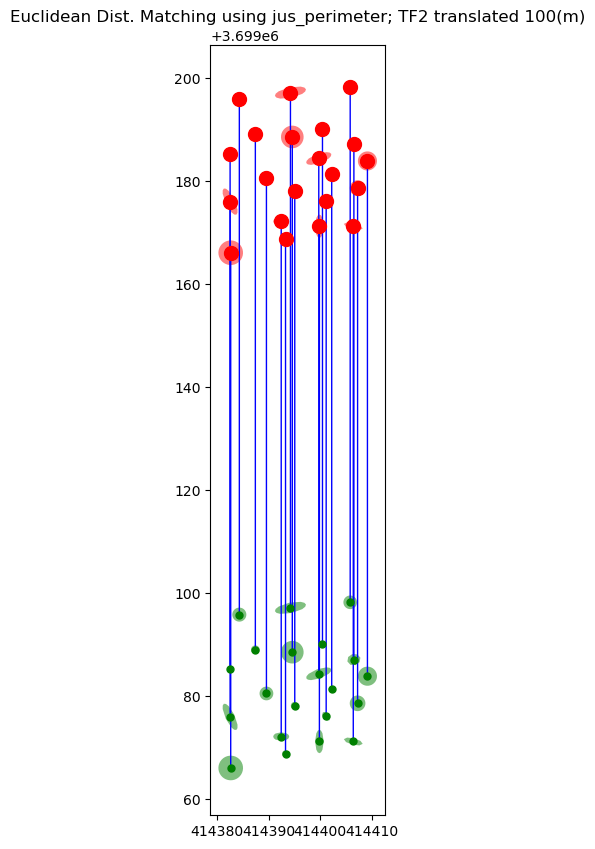

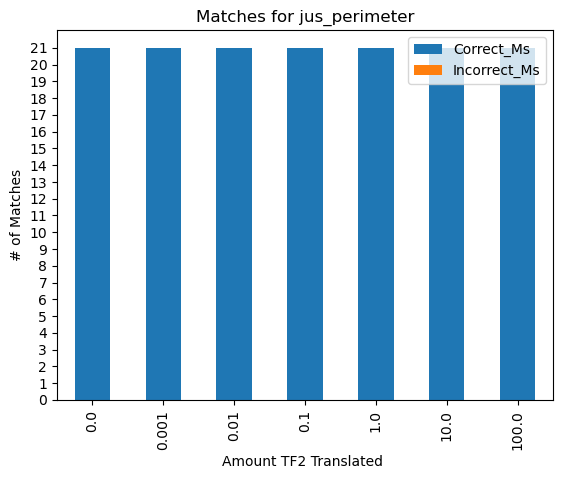

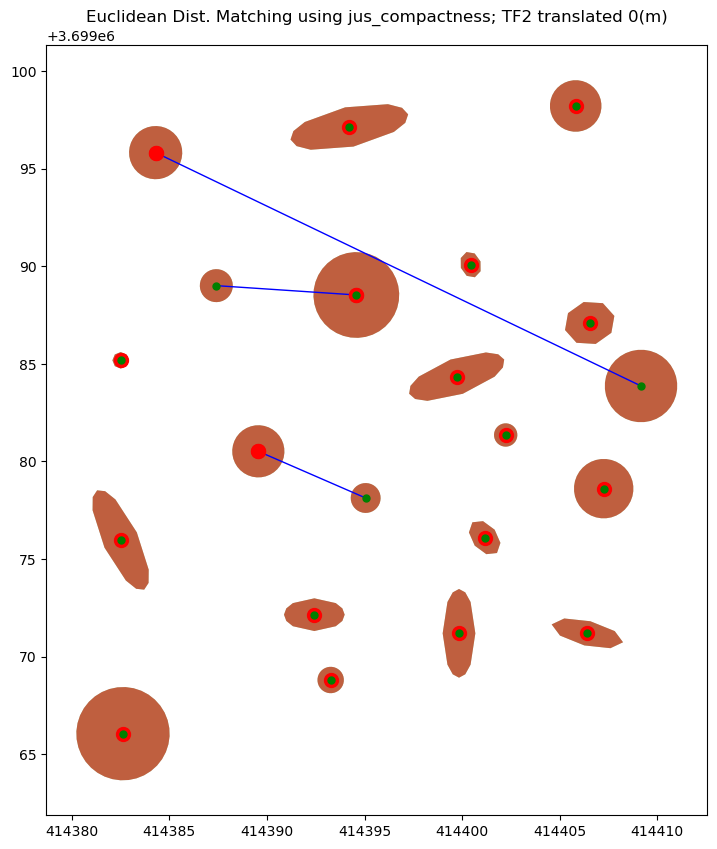

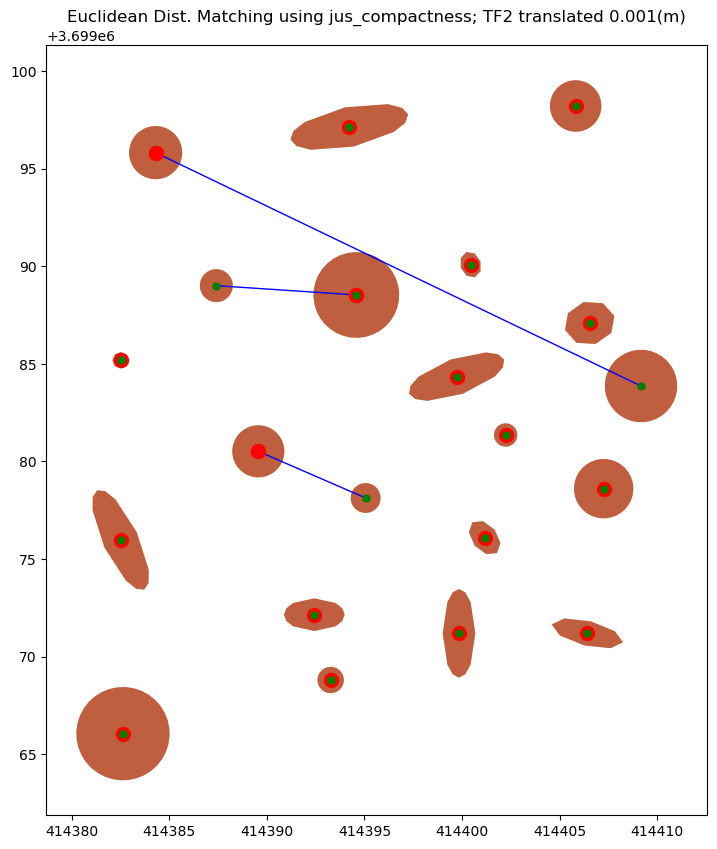

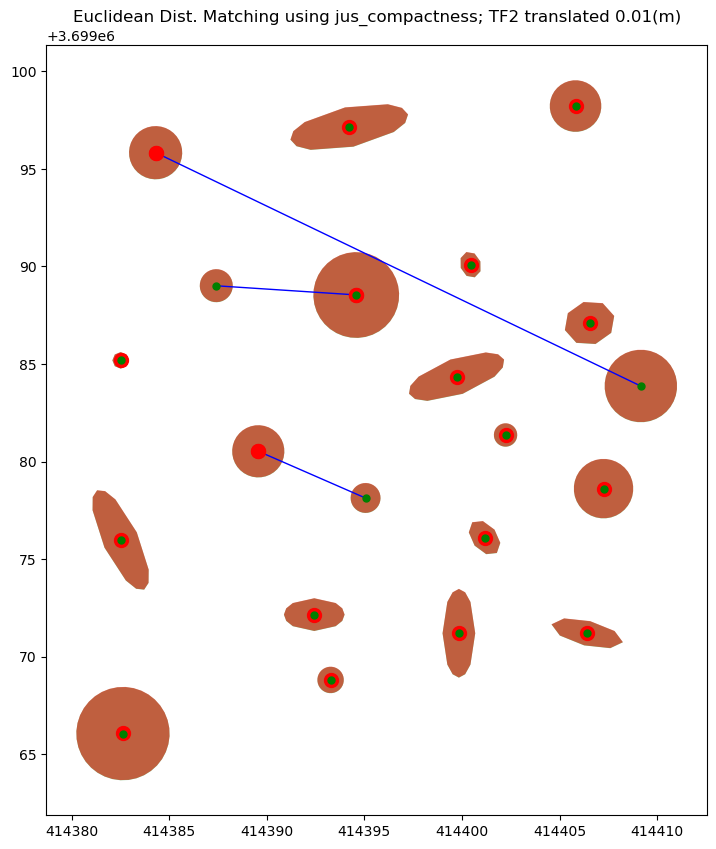

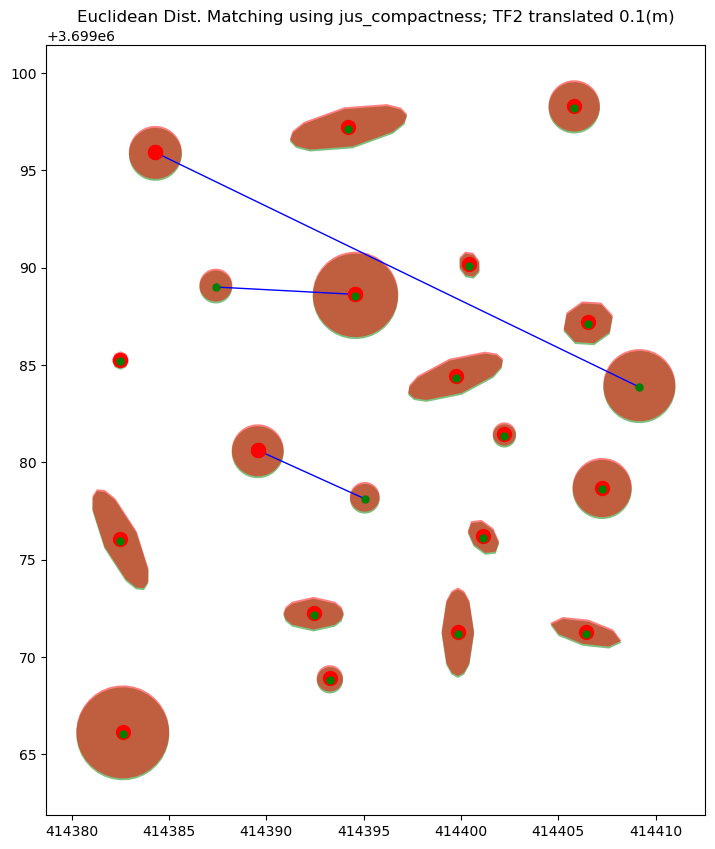

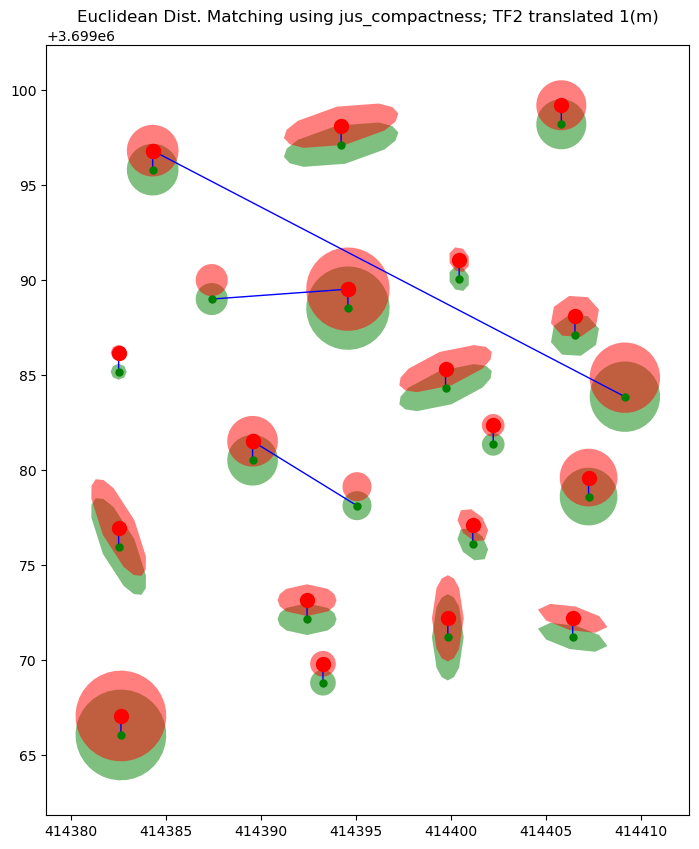

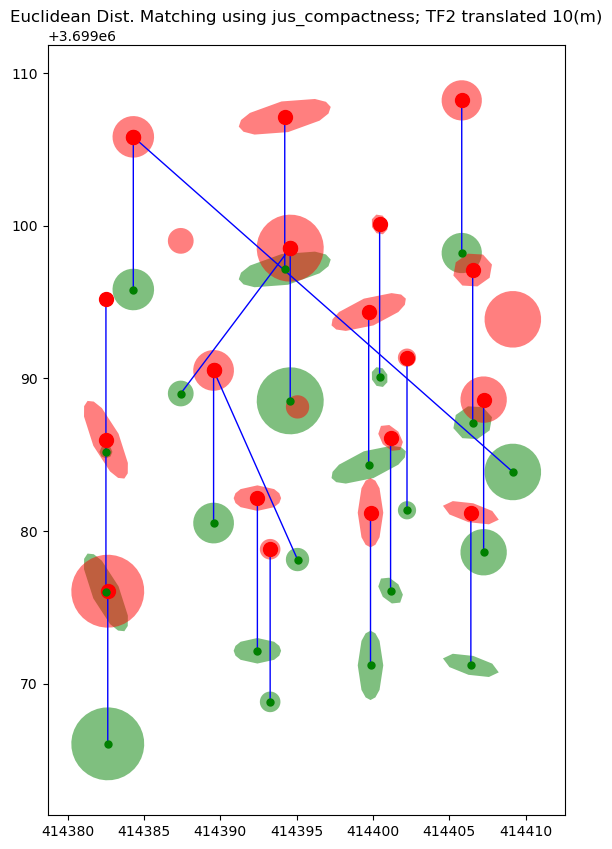

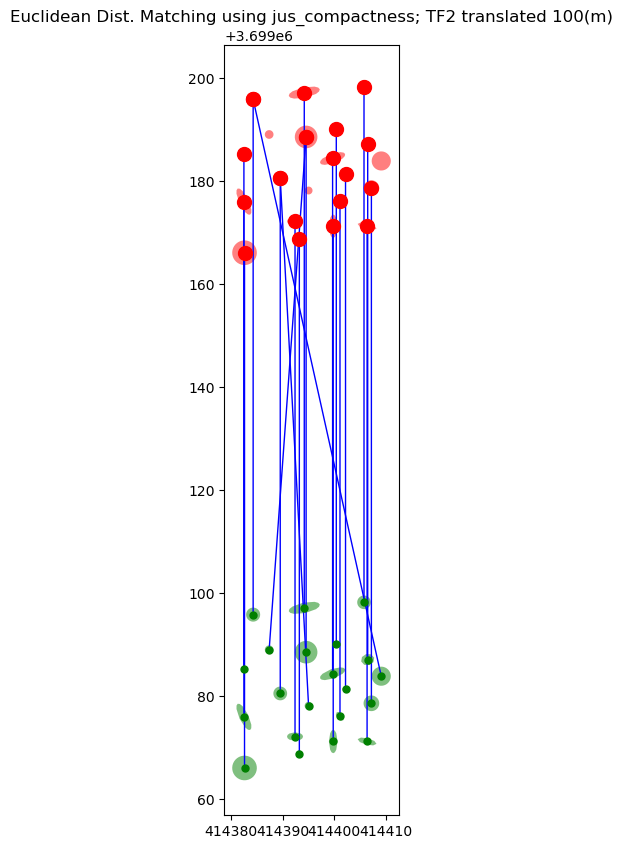

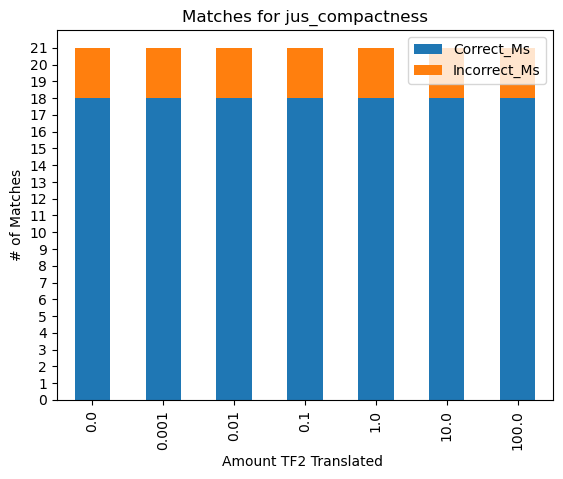

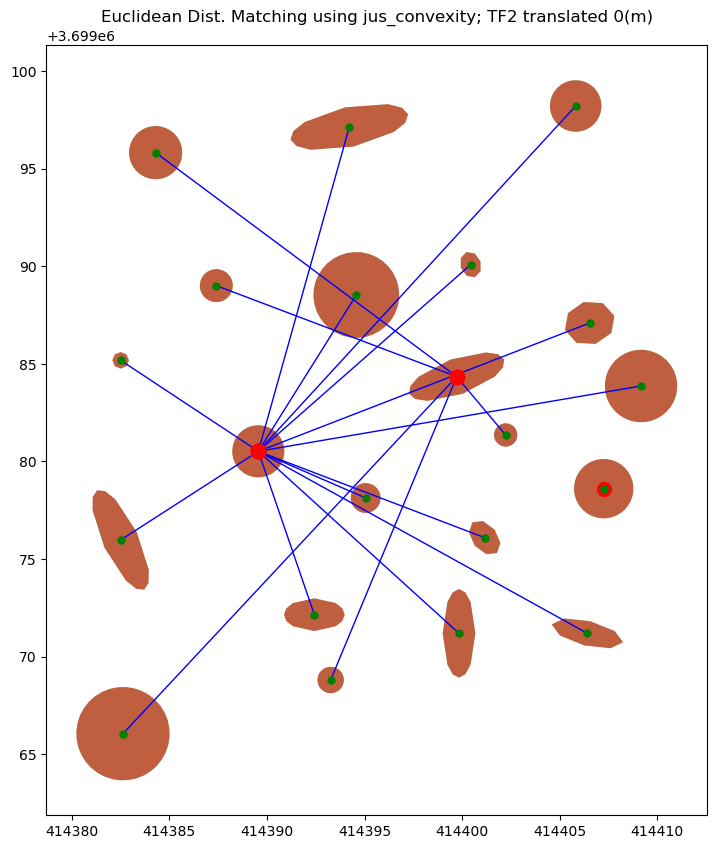

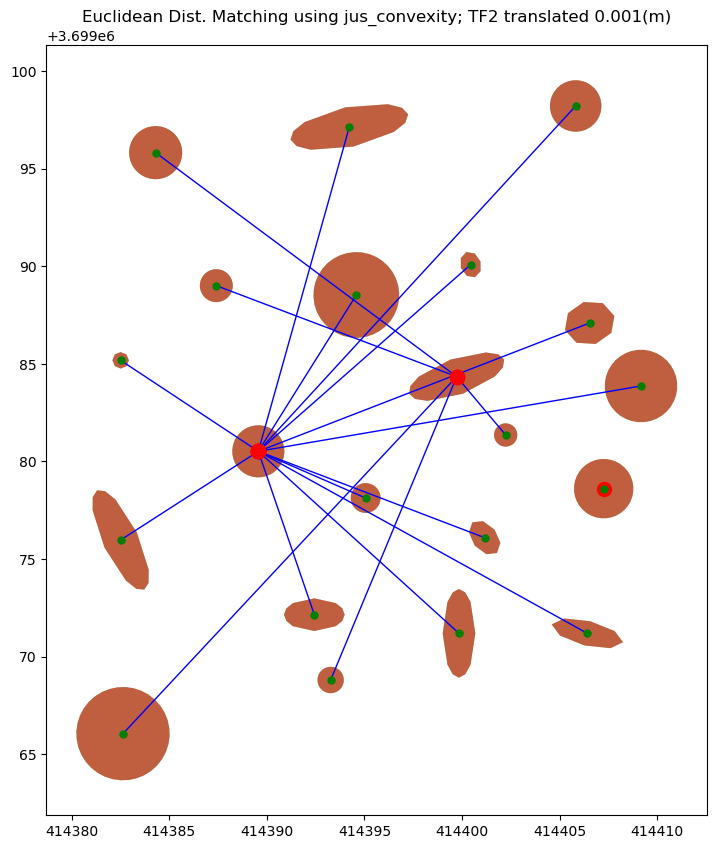

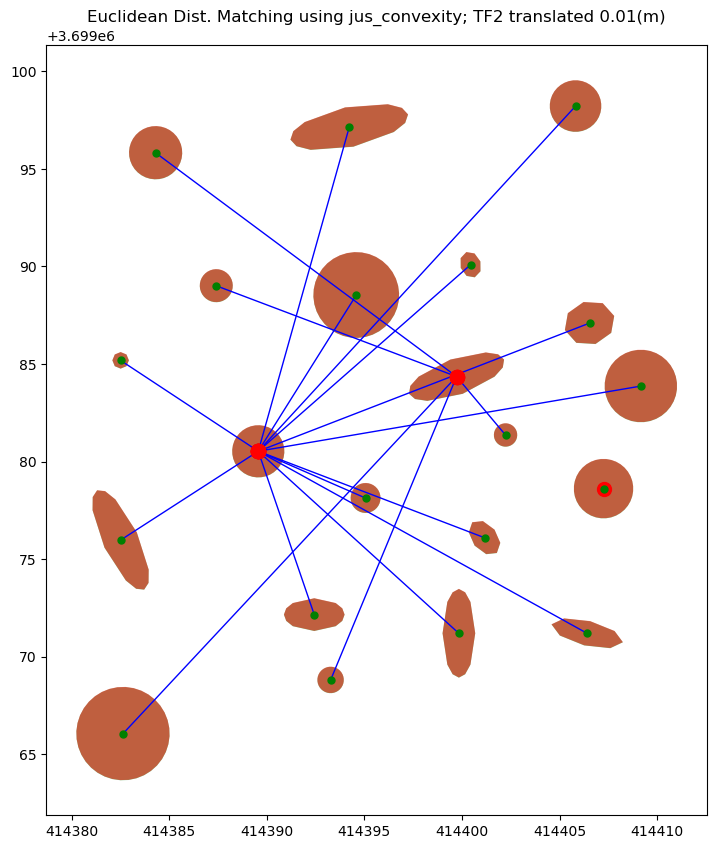

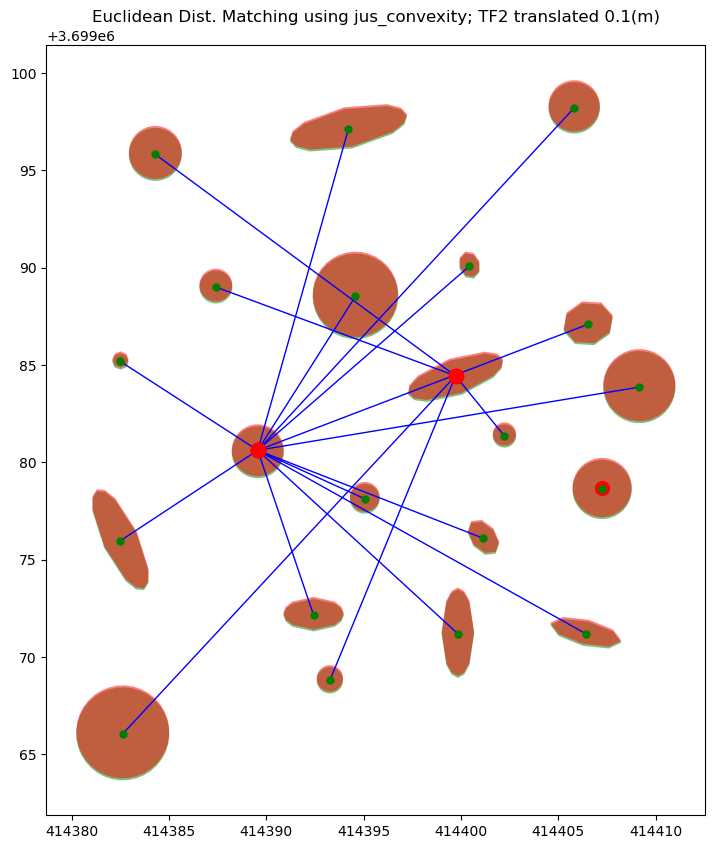

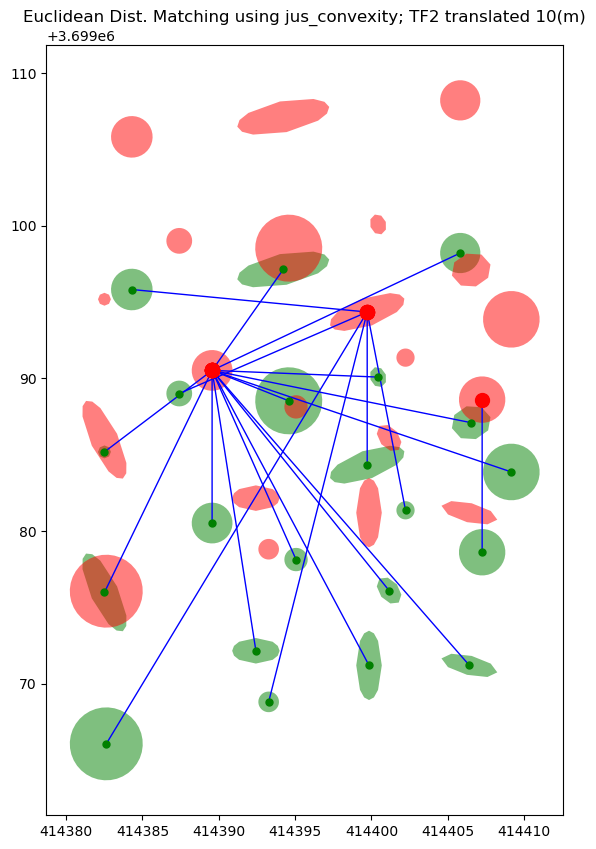

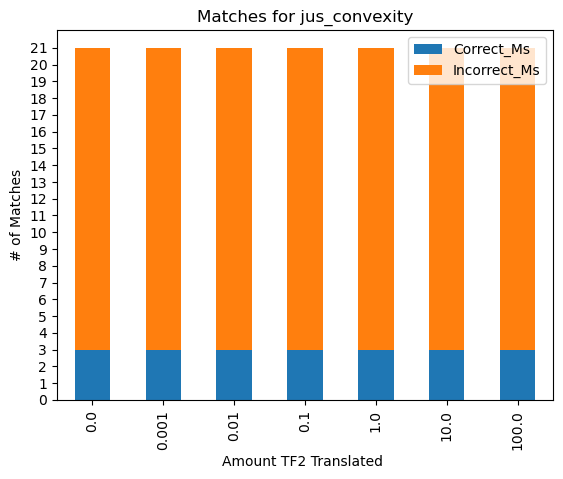

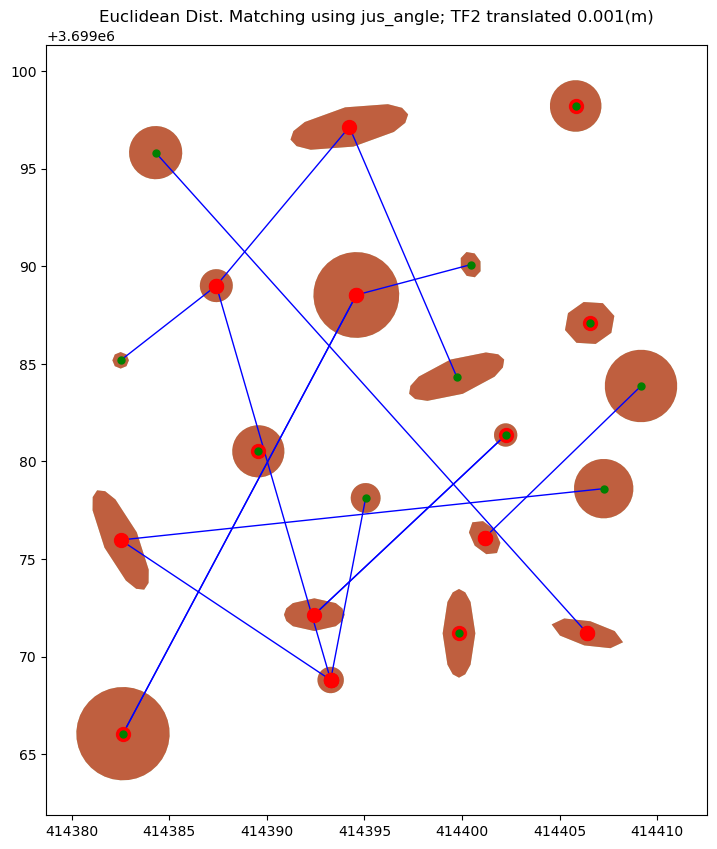

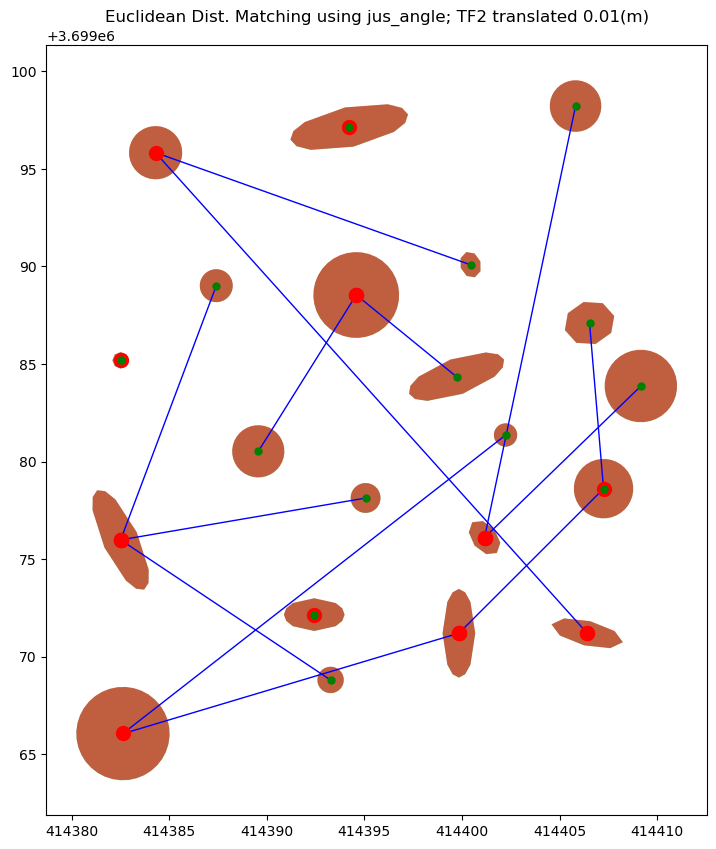

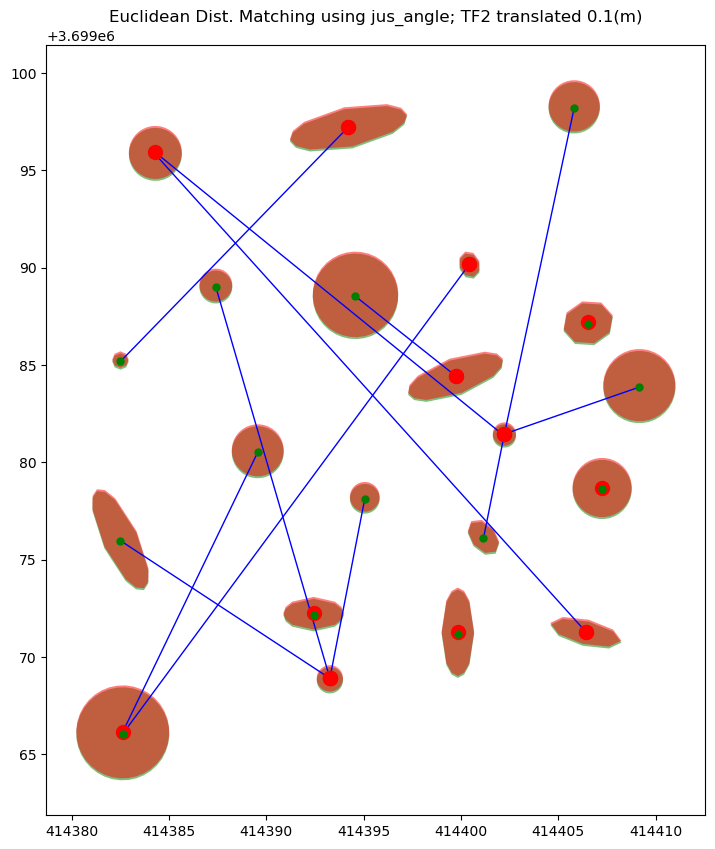

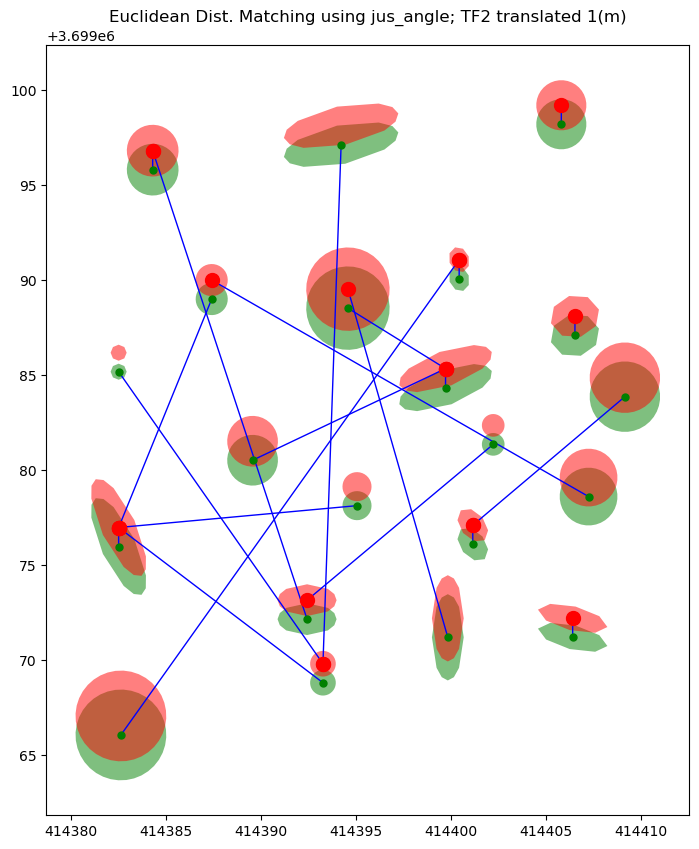

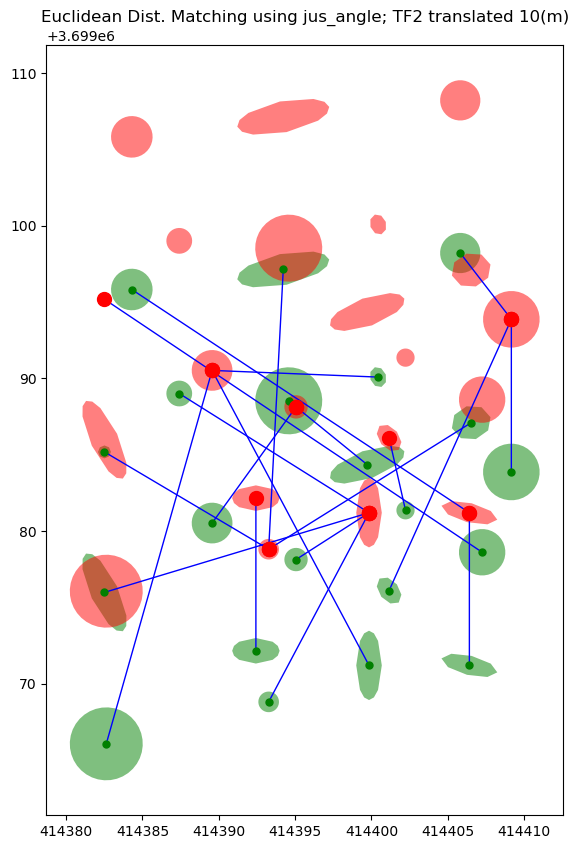

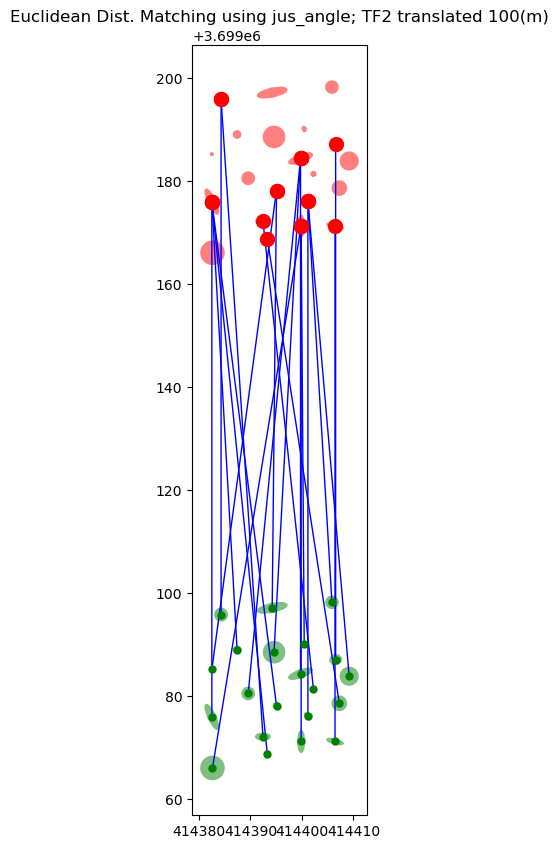

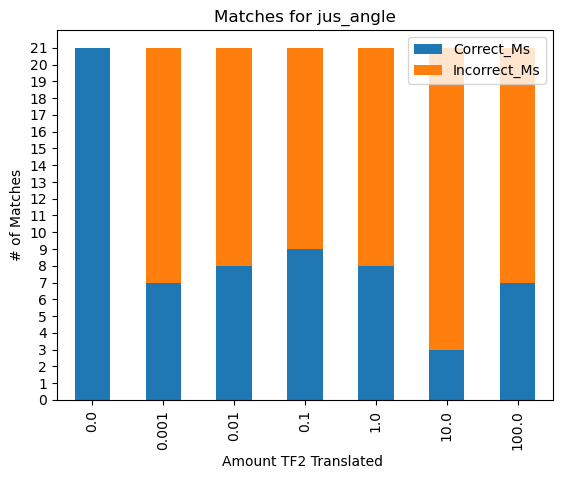

In [5]:
#k =[1,2]
for n in range(len(exp_arr)):
    matches_df = pd.DataFrame()
    corr_m = []
    incorr_m = []
    for m in range(len(mod)):
        # Open rock shp
        # TIME FRAME 1
        print('opening shapefile..')
        df = gpd.read_file("test_rocks_11_12_22/test_rocks.shp")
        #TIME FRAME 2 
        df3 = gpd.read_file("test_rocks_11_12_22/test_rocks.shp")
        use_params = exp_arr[n]
        print('use_params', use_params)
        # Modify DF3
        #Apply changes to Timeframe 2

        if  mod == rot_exps:
            df3['geometry'] = df3.rotate(mod[m]) # rotate rocks 
            print('rotating TF2 ' + str(mod[m]) + ' degrees')
        if  mod == trans_exps:
            df3['geometry'] = df3.translate(0, mod[m]) # translate rocks
            print('translating TF2' + str(mod[m]) + ' meters')
        #if  mod == area_exps:
            #df3['area'] = df3['area'] + mod[m]

        # RUN GEOMETRIC CALCULATIONS
        print('running geometric calculations for df...')
        df.head()

        # Area
        df["area"] = df.area
        df['centroid'] = df.centroid
        df['centroid']
        df = df.set_geometry("geometry")

        # spatial position (centroid values of each rock)
        df['cent_x']=None # empty columns for centroid x,y vals
        df['cent_y']=None

        for i in range(len(df)): # fill columns w/ x,y vals from centroid Point 
            df['cent_x'][i] = df['centroid'][i].x
            df['cent_y'][i] = df['centroid'][i].y

        df['ecc'] = None
        df['r_ecc'] = None
        for j in range(len(df)):
            try:
                area_polygon = [[i[1],i[0]] for i in list(df['geometry'][j].exterior.coords)]
            except:
                area_polygon = [[i[1],i[0]]  for poly in list(df['geometry'][j]) for i in list(poly.exterior.coords)]
            df['ecc'][j] = rm.get_ecc(area_polygon)
            df['r_ecc'][j] = df['ecc'][j] + 1 # Re-scale ecc by adding 1 to avoid division by zero

        df["perimeter"] = df["geometry"].length
        df["compactness"] = df.geometry.apply(rm.pp_compactness)
        df["convexity"] = df.geometry.apply(rm.convexity)
        df["solidity"] = df.geometry.apply(rm.solidity)
        df["angle"] = df.geometry.apply(rm.getAngle)


        #### DF3 -- TIME FRAME 2 #--------------------------------------------------------
        print('running geometric calculations for df3....')
        # create & populate area and centroid attributes
        df3["area"] = df3.area
        df3['centroid'] = df3.centroid
        df3['centroid']
        df3 = df3.set_geometry("geometry")

        df3['cent_x']=None # empty columns for centroid x,y vals
        df3['cent_y']=None

        for i in range(len(df3)): # fill columns w/ x,y vals from centroid Point 
            df3['cent_x'][i] = df3['centroid'][i].x
            df3['cent_y'][i] = df3['centroid'][i].y

        df3['ecc'] = None
        df3['r_ecc'] = None
        for j in range(len(df3)):
            try:
                area_polygon = [[i[1],i[0]] for i in list(df3['geometry'][j].exterior.coords)]
            except:
                area_polygon = [[i[1],i[0]]  for poly in list(df3['geometry'][j]) for i in list(poly.exterior.coords)]
            df3['ecc'][j] = rm.get_ecc(area_polygon)
            df3['r_ecc'][j] =  df3['ecc'][j] + 1 # Re-scale ecc by adding 1 to avoid division by zero
            
        df3["perimeter"] = df3["geometry"].length
        df3["compactness"] = df3.geometry.apply(rm.pp_compactness)
        df3["convexity"] = df3.geometry.apply(rm.convexity)
        df3["solidity"] = df3.geometry.apply(rm.solidity)
        df3["angle"] = df3.geometry.apply(rm.getAngle)

        ## Visualize Rock SHPs
        #df.plot(color = 'g', figsize=(10,10), alpha = 0.5)
        #plt.title("Time Frame 1: Semantically Mapped Rocks")
        #df3.plot(color = 'r', figsize=(10,10), alpha = 0.5)
        #plt.title("Time Frame 2: Semantically Mapped Rocks")

        ## VECTORIZATION -- Both DFs
        # VECT DF 1
        print('running vectorization...')
        # creates a vector attribute representing the combined geometric params
        df['feature_vec'] = None
        for i in range(len(df)):
            
            # All Geometric Params --- Krutharth's OG settings
            if use_params == 'all_geom':
                df['feature_vec'][i] = [df["area"][i], df['ecc'][i], df['perimeter'][i], df['compactness'][i], df['convexity'][i], df['solidity'][i], df['angle'][i]]
            
            #Just centroid
            if use_params == 'jus_centroid':
                df['feature_vec'][i] = [df["cent_x"][i], df["cent_y"][i]]

            # Just area
            if use_params =='jus_area':
                df['feature_vec'][i] = [df["area"][i]]

            # Just ecc
            if use_params == 'jus_ecc':
                df['feature_vec'][i] = [df["r_ecc"][i]]

            # Just perimeter
            if use_params =='jus_perimeter':
                df['feature_vec'][i] = [df["perimeter"][i]]
            
            # Just compactness
            if use_params =='jus_compactness':
                df['feature_vec'][i] = [df["compactness"][i]]

            # Just convexity
            if use_params =='jus_convexity':
                df['feature_vec'][i] = [df["convexity"][i]]

            # Just solidity
            if use_params =='jus_solidity':
                df['feature_vec'][i] = [df["solidity"][i]]

            # Just angle
            if use_params =='jus_angle':
                df['feature_vec'][i] = [df["angle"][i]]

            if use_params =='all':
                df['feature_vec'][i] = [df["cent_x"][i], df["cent_y"][i], df["area"][i], df['ecc'][i], df['perimeter'][i], df['compactness'][i], df['convexity'][i], df['solidity'][i], df['angle'][i]]

        # VECT DF 2
        df3['feature_vec'] = None
        for i in range(len(df3)):
            # All Geometric Params --- Krutharth's OG settings
            if use_params =='all_geom':
                df3['feature_vec'][i] = [df3["area"][i], df3['ecc'][i], df3['perimeter'][i], df3['compactness'][i], df3['convexity'][i], df3['solidity'][i], df3['angle'][i]]
            
            # Just centroid:
            if use_params =='jus_centroid':
                df3['feature_vec'][i] = [df3["cent_x"][i], df3["cent_y"][i]]

            # Just area
            if use_params =='jus_area':
                df3['feature_vec'][i] = [df3["area"][i]]

            # Just ecc
            if use_params =='jus_ecc':
                df3['feature_vec'][i] = [df3["r_ecc"][i]]

            # Just perimeter
            if use_params =='jus_perimeter':
                df3['feature_vec'][i] = [df3["perimeter"][i]]

            # Just compactness
            if use_params =='jus_compactness':
                df3['feature_vec'][i] = [df3["compactness"][i]]

            # Just convexity
            if use_params =='jus_convexity':
                df3['feature_vec'][i] = [df3["convexity"][i]]

            # Just solidity
            if use_params =='jus_solidity':
                df3['feature_vec'][i] = [df3["solidity"][i]]

            # Just angle
            if use_params =='jus_angle':
                df3['feature_vec'][i] = [df3["angle"][i]]
            
            if use_params =='all':
            # All params (Centroid + All geometric)
                df3['feature_vec'][i] = [df3["cent_x"][i], df3["cent_y"][i], df3["area"][i], df3['ecc'][i], df3['perimeter'][i], df3['compactness'][i], df3['convexity'][i], df3['solidity'][i], df3['angle'][i]]

        # RUN Euclidean Dist with df & df3
        df['nearest_matching_polygon_eucld'] = None
        df['min_eucld'] = 1000000000000000.0 #1000000000.0 # This number needs to be bigger than any possible SM calc in loop
        for i in range(len(df)):
            for j in range(len(df3)):
                #print(i, j) # nested loop compares similarity of ea i w/ ea j
                # calc eucld dist of current i & j:
                curr_eucld = rm.Euclidean(df['feature_vec'][i], df3['feature_vec'][j])
                
                #print('curr_eucld',  curr_eucld, df['feature_vec'][i], df3['feature_vec'][j])
                
                if df['min_eucld'][i] > curr_eucld:
                    df['min_eucld'][i] = curr_eucld
                    df['nearest_matching_polygon_eucld'][i] = j

        # Visualize eucld Results 
        correct_m,incorrect_m = rm.check_matches('_eucld', df, df3,False)
        corr_m.append(correct_m)
        incorr_m.append(incorrect_m)

        # Maps of matching results
        df = rm.get_rock_and_line('_eucld', df, df3)
        df_sorted = df.sort_values('min_eucld')
        df_sorted.reset_index(drop=True, inplace=True)

        fig, ax = plt.subplots(figsize = (10,10))
        fig.patch.set_facecolor('white')

        # plot both data frames (on same plot)
        df.plot(color = 'g', ax=ax, figsize=(5,5), alpha = 0.5)
        df3.plot(color = 'r', ax=ax , figsize=(5,5), alpha = 0.5) # alpha adjusted to see overlap of df's
    ## BAR PLOT TITLE
        plt.title('Euclidean Dist. Matching using '+ exp_arr[n] + '; TF2 translated ' + str(mod[m]) + '(m)')
        for i in range(0, len(df)):
                #i = 10
                xy = [y for y in df_sorted['line'][i].coords]
                #xy = (x[i],y[i])
                con = ConnectionPatch(xyA=xy[1], xyB=xy[0], coordsA="data", coordsB="data",
                                    axesA=ax, axesB=ax, color="blue")
                ax.add_artist(con)

                ax.plot(xy[1][0],xy[1][1],'ro',markersize=10,color='r')
                ax.plot(xy[0][0],xy[0][1],'ro',markersize=5, color='g')
        fig.show()
    
    # Bar plot of matching results
    matches_df['mod'] = mod
    matches_df['Correct_Ms'] = corr_m
    matches_df['Incorrect_Ms'] = incorr_m
    matches_df.plot.bar(title = 'Matches for '+ exp_arr[n],stacked=True, x = 'mod', yticks=np.linspace(0,len(df),len(df)+1), xlabel = 'Amount TF2 Translated ', ylabel ='# of Matches')

   

